From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



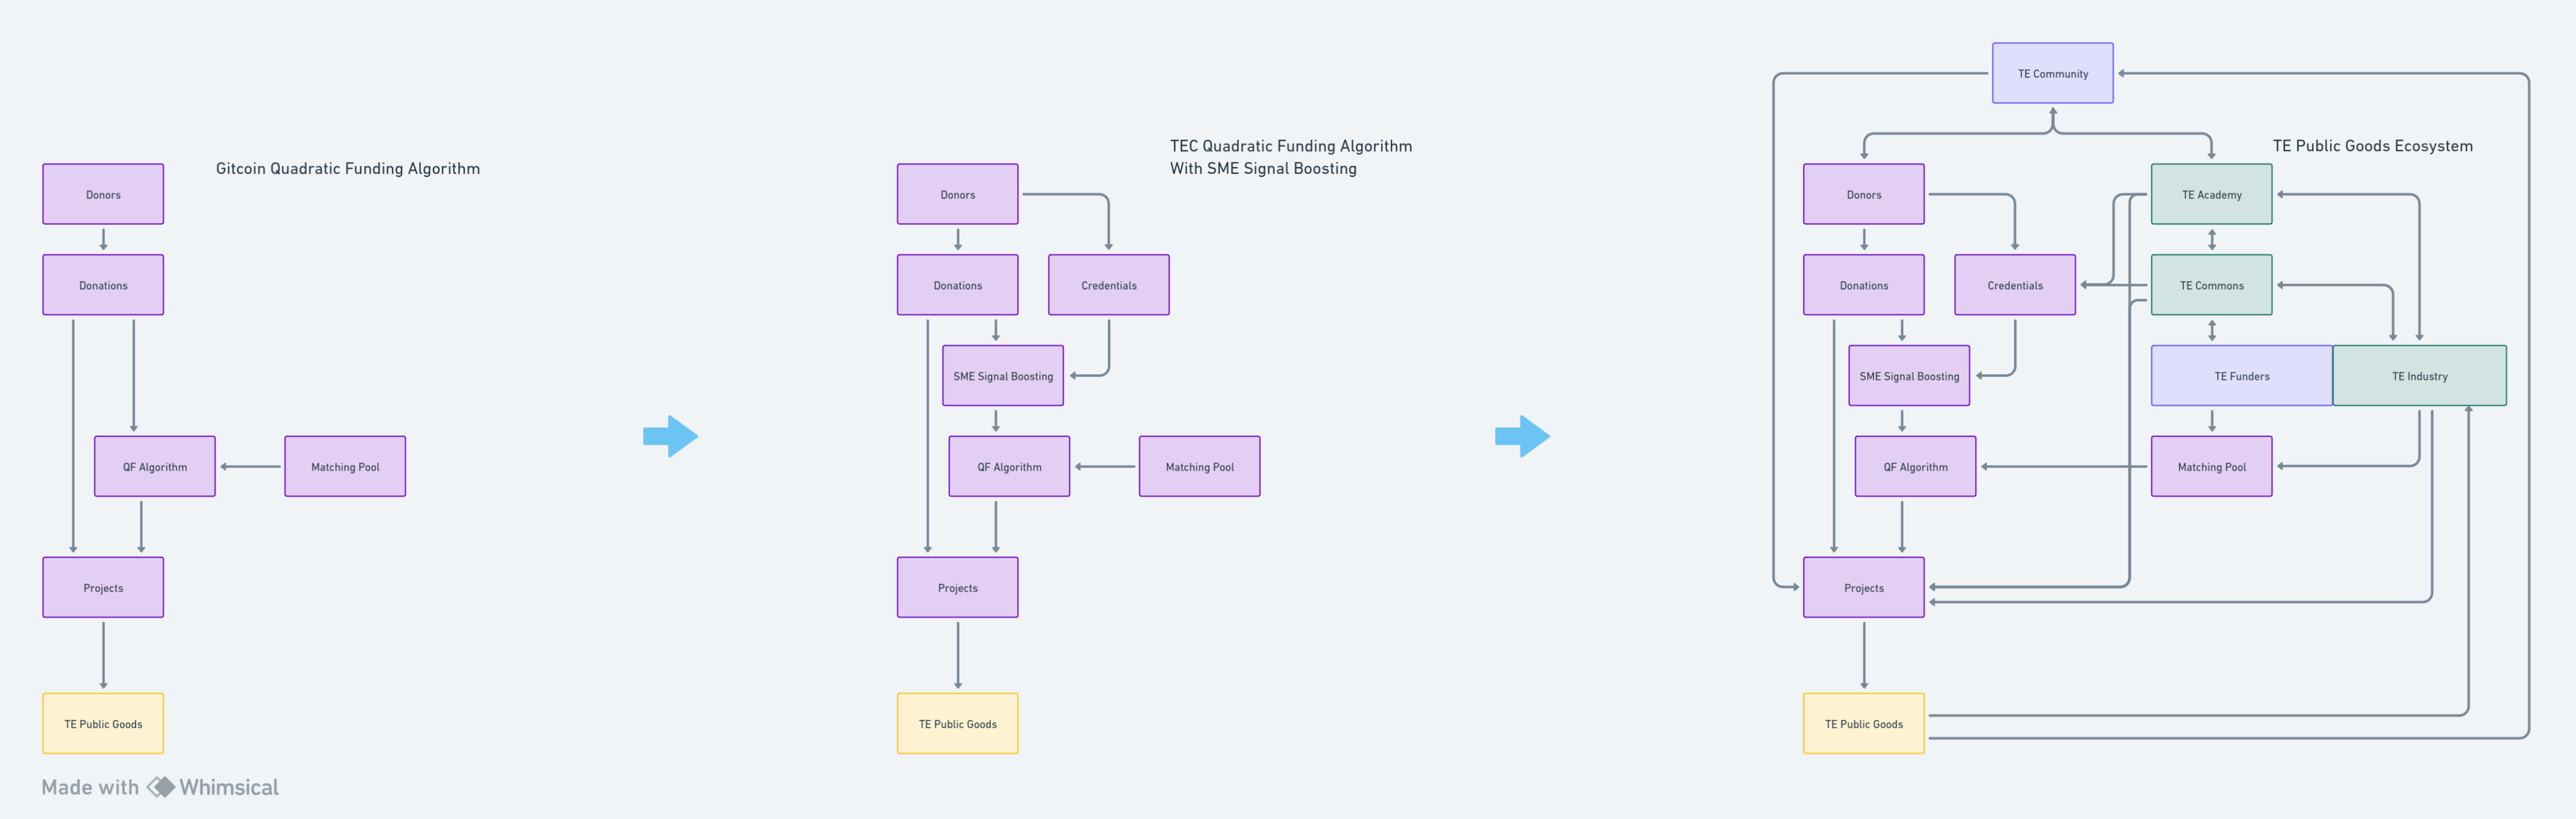![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([17, 11, 19,  9, 29, 26, 23, 22, 20,  2,  0, 21,  6, 18, 24, 28,  7,
       25, 16,  8, 15, 27,  1,  3,  4, 14,  5, 10])

In [3]:
public_goods

[(0, 6),
 (1, 3),
 (2, 16),
 (3, 0),
 (4, 1),
 (5, 20),
 (6, 15),
 (7, 24),
 (8, 16),
 (9, 29),
 (10, 26),
 (11, 1),
 (12, 7),
 (13, 7),
 (14, 19),
 (15, 17),
 (16, 28),
 (17, 2),
 (18, 11),
 (19, 1)]

In [4]:
len(society)

30

In [5]:
len(community)

28

In [6]:
len(public_goods)

20

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0, 'f1': 0.8451752065385512, 'steepness': 11.048080619475497}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=599, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 600)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000      0.267606     0.082414     0.012938     0.000000     0.000000   
0.002506      0.268733     0.092311     0.020907     0.001979     0.007703   
0.005013      0.269837     0.101866     0.028777     0.003946     0.015160   
0.007519      0.270917     0.111092     0.036550     0.005902     0.022379   
0.010025      0.271975     0.120000     0.044227     0.007848     0.029367   
...                ...          ...          ...          ...          ...   
0.989975      0.320815     0.369672     0.651611     0.313131     0.241323   
0.992481      0.320816     0.369672     0.651669     0.313342     0.241323   
0.994987      0.320816     0.369672     0.651726     0.313553     0.241323   
0.997494      0.320816     0.369672     0.651783     0.313762     0.241323   
1.000000      0.320816     0.369672     0.651839     0.313970     0.241323   

value_p_i  ((0, 6), 5)  ((0, 6), 6)  ((0, 6), 7)  ((0, 6), 8)  ((0, 6), 9)  \
funding                                                                      
0.000000      0.000000     0.145538     0.088135     0.000000     0.076513   
0.002506      0.023437     0.152825     0.095172     0.000163     0.096936   
0.005013      0.046019     0.159944     0.101916     0.000326     0.116502   
0.007519      0.067778     0.166900     0.108379     0.000488     0.135249   
0.010025      0.088743     0.173697     0.114574     0.000650     0.153210   
...                ...          ...          ...          ...          ...   
0.989975      0.642704     0.463427     0.257289     0.037177     0.563822   
0.992481      0.642704     0.463428     0.257289     0.037225     0.563822   
0.994987      0.642704     0.463428     0.257289     0.037272     0.563822   
0.997494      0.642704     0.463429     0.257289     0.037320     0.563822   
1.000000      0.642704     0.463430     0.257289     0.037367     0.563822   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       0.000000       0.025500       0.097320       0.000000   
0.002506   ...       0.008217       0.026100       0.101110       0.038686   
0.005013   ...       0.016353       0.026686       0.104888       0.075616   
0.007519   ...       0.024407       0.027259       0.108656       0.110870   
0.010025   ...       0.032381       0.027819       0.112413       0.144524   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.808946       0.051628       0.995128       0.852458   
0.992481   ...       0.809103       0.051628       0.996351       0.852458   
0.994987   ...       0.809259       0.051628       0.997571       0.852458   
0.997494   ...       0.809413       0.051628       0.998787       0.852458   
1.000000   ...       0.809566       0.051628       1.000000       0.852458   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        0.015970       0.342871            0.0       0.221378   
0.002506        0.023609       0.347141            0.0       0.221378   
0.005013        0.031127       0.351294            0.0       0.221378   
0.007519        0.038526       0.355333            0.0       0.221378   
0.010025        0.045807       0.359262            0.0       0.221378   
...                  ...            ...            ...            ...   
0.989975        0.496664       0.498685            0.0       0.221378   
0.992481        0.496678       0.498685            0.0       0.221378   
0.994987        0.496691       0.498686            0.0       0.221378   
0.997494        0.496705       0.498686            0.0       0.221378   
1.000000        0.496718       0.498686            0.0       0.221378   

value

Display Citizen Preferences for Funding.

In [17]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [20]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [21]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=20)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [22]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 20,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [23]:
dist_gen.generate_distribution()

0     0.035131
1     0.004281
2     0.059479
3     0.076703
4     0.028534
5     0.052949
6     0.043736
7     0.015283
8     0.014937
9     0.159723
10    0.053861
11    0.009154
12    0.159723
13    0.049176
14    0.013539
15    0.128600
16    0.005848
17    0.004903
18    0.004581
19    0.079861
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [24]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [25]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [26]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.007791
1     0.075676
2     0.020021
3     0.026329
4     0.032425
5     0.036793
6     0.020580
7     0.124305
8     0.223108
9     0.016558
10    0.004827
11    0.010741
12    0.116427
13    0.142405
14    0.003321
15    0.039136
16    0.047136
17    0.013136
18    0.013929
19    0.025355
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [27]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 20
ic|k: 19


In [28]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by citizen I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=20)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [29]:
len(public_goods)

20

In [30]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [31]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.090723  0.145548  0.384463  0.000000  0.000000  0.008087   
1            1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.478768   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.087590  0.000000  0.076990  0.126252  0.000000  0.000000   
7            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.297584  0.297523   
9            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10           0.511677  0.000000  0.000000  0.230396  0.000000  0.000000   
11           0.063810  0.117256  0.000000  0.293556  0.000000  0.040189   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.439357  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.076292   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.577218  0.000000  0.000000  0.000000  0.000000   
19           0.320578  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.191511  0.033564  0.000000  0.124454  0.009062  0.008945   
21           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.163736  0.000000  0.000000  0.365405  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.435994  0.000000   
25           0.000000  0.000000  0.000000  0.223541  0.000000  0.402757   
26           0.000000  0.000000  0.061730  0.102652  0.084563  0.000000   
27           0.000000  0.224562  0.113454  0.000000  0.000000  0.000000   
28           0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.281265  0.000000   

Public Good        6         7         8         9         10        11  \
Citizen                                                                   
0            0.273195  0.000000  0.000000  0.033148  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.264593   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.166174  0.026896  0.000000  0.000000  0.000000  0.006559   
7            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.185126  0.161680   
9            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.234065  0.000000  0.000000  0.000000   
11           0.048171  0.178357  0.000000  0.000000  0.098983  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.354042   
13           0.000000  0.007886  0.000000  0.000000  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.948367   
15           0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
16           0.036079  0.538050  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.041755  0.000000  0.000000   
19           0.679422  0

In [32]:
contributions.sum()

Public Good
0     3.429625
1     3.098148
2     1.636638
3     1.905614
4     1.108467
5     1.312561
6     1.231616
7     1.751189
8     0.310651
9     0.161630
10    1.751112
11    2.118647
12    1.815973
13    1.470983
14    1.660983
15    0.826704
16    0.364972
17    2.042965
18    0.437175
19    1.564347
dtype: float64

In [33]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [34]:
contributions.sum().sum()

30.0

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [35]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [36]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [37]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
dtype: float64

In [38]:
public_goods_funding.sum(axis=1)

Citizen
0     0.919052
1     0.291577
2     1.042605
3     0.602053
4     0.322773
5     0.679817
6     0.718113
7     0.322773
8     0.747433
9     0.571041
10    1.078145
11    0.520856
12    0.483294
13    0.539449
14    0.589100
15    0.571066
16    0.683320
17    0.489485
18    0.937901
19    0.645124
20    0.557767
21    0.291577
22    0.804009
23    0.550669
24    0.812922
25    0.938923
26    1.308739
27    0.688058
28    0.611009
29    0.681350
dtype: float64

In [39]:
public_goods_funding.sum().sum()

20.0

In [40]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [41]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [42]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [43]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [44]:
normalized_contributions.sum(axis=0)

Public Good
0     0.007791
1     0.075676
2     0.020021
3     0.026329
4     0.032425
5     0.036793
6     0.020580
7     0.124305
8     0.223108
9     0.016558
10    0.004827
11    0.010741
12    0.116427
13    0.142405
14    0.003321
15    0.039136
16    0.047136
17    0.013136
18    0.013929
19    0.025355
dtype: float64

#### The Normalized Citizen Cost Distribution

In [45]:
normalized_contributions.sum(axis=1)

Citizen
0     0.025025
1     0.002272
2     0.038973
3     0.001999
4     0.024426
5     0.096809
6     0.039694
7     0.024426
8     0.021125
9     0.070983
10    0.173210
11    0.023223
12    0.005948
13    0.042069
14    0.011476
15    0.002757
16    0.050158
17    0.006430
18    0.035950
19    0.012081
20    0.007323
21    0.002272
22    0.015555
23    0.064113
24    0.025119
25    0.031821
26    0.083201
27    0.035733
28    0.012233
29    0.013595
dtype: float64

In [46]:
normalized_contributions.sum().sum()

1.0

### The Total Utility of Citizens

#### Value Functions Dataset Revisited

Melting preferences to get groupby on public good or on citizen.

In [47]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

value_p_i     value public_good citizen
funding                                              
0.000000    ((0, 6), 0)  0.267606      (0, 6)       0
0.002506    ((0, 6), 0)  0.268733      (0, 6)       0
0.005013    ((0, 6), 0)  0.269837      (0, 6)       0
0.007519    ((0, 6), 0)  0.270917      (0, 6)       0
0.010025    ((0, 6), 0)  0.271975      (0, 6)       0
...                 ...       ...         ...     ...
0.989975  ((19, 1), 29)  0.964152     (19, 1)      29
0.992481  ((19, 1), 29)  0.964152     (19, 1)      29
0.994987  ((19, 1), 29)  0.964152     (19, 1)      29
0.997494  ((19, 1), 29)  0.964152     (19, 1)      29
1.000000  ((19, 1), 29)  0.964152     (19, 1)      29

[240000 rows x 4 columns]

Groupby funding and public good to get mean funding preferences per public good.

Display mean value function per public good.

In [48]:
df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index().hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [49]:
df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index().hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Value per Citizen as Public Goods are Funded')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total value per public good given funding.

In [50]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good     (0, 6)     (1, 3)   (10, 26)    (11, 1)    (12, 7)    (13, 7)  \
funding                                                                         
0.000000      5.467165   4.673087   5.390066   3.803231   6.567359   4.243385   
0.002506      5.698365   5.012848   5.708675   4.167881   6.800546   4.446304   
0.005013      5.921604   5.340569   6.016548   4.520155   7.027185   4.643387   
0.007519      6.137183   5.656714   6.314077   4.860514   7.247491   4.834825   
0.010025      6.345392   5.961728   6.601637   5.189404   7.461673   5.020805   
...                ...        ...        ...        ...        ...        ...   
0.989975     13.739172  15.931758  16.721982  16.874797  17.977692  13.512915   
0.992481     13.740183  15.932219  16.723257  16.875817  17.980357  13.514739   
0.994987     13.741190  15.932676  16.724524  16.876830  17.983008  13.516554   
0.997494     13.742192  15.933128  16.725785  16.877835  17.985644  13.518360   
1.000000     13.743189  15.933576  16.727038  16.878833  17.988266  13.520157   

public_good   (14, 19)   (15, 17)   (16, 28)    (17, 2)   (18, 11)    (19, 1)  \
funding                                                                         
0.000000      4.504062   3.724496   4.784354   5.823575   5.142320   4.778126   
0.002506      4.816374   3.991111   5.092529   6.063856   5.464429   5.097690   
0.005013      5.117659   4.249925   5.390201   6.297125   5.776450   5.405464   
0.007519      5.408349   4.501221   5.677762   6.523633   6.078735   5.701926   
0.010025      5.688854   4.745268   5.955587   6.743621   6.371623   5.987531   
...                ...        ...        ...        ...        ...        ...   
0.989975     15.069281  16.546569  15.519116  17.699803  18.018526  15.946541   
0.992481     15.069991  16.549415  15.519715  17.702232  18.020750  15.948545   
0.994987     15.070697  16.552247  15.520308  17.704645  18.022964  15.950540   
0.997494     15.071399  16.555065  15.520897  17.707044  18.025169  15.952525   
1.000000     15.072096  16.557870  15.521482  17.709427  18.027365  15.954501   

public_good    (2, 16)     (3, 0)     (4, 1)    (5, 20)    (6, 15)    (7, 24)  \
funding                                                                         
0.000000      4.146921   4.109298   5.385057   6.950576   4.569171   4.831815   
0.002506      4.459293   4.365021   5.702059   7.178824   4.900744   5.325688   
0.005013      4.761317   4.612343   6.006832   7.399770   5.221013   5.802248   
0.007519      5.053361   4.851575   6.299883   7.613691   5.530404   6.262151   
0.010025      5.335781   5.083015   6.581702   7.820854   5.829326   6.706028   
...                ...        ...        ...        ...        ...        ...   
0.989975     14.624881  13.640985  15.768470  17.051130  16.260275  21.172943   
0.992481     14.625112  13.641549  15.770129  17.052926  16.260875  21.173933   
0.994987     14.625340  13.642109  15.771780  17.054712  16.261469  21.174917   
0.997494     14.625566  13.642664  15.773421  17.056486  16.262058  21.175894   
1.000000     14.625790  13.643215  15.775054  17.058249  16.262642  21.176866   

public_good    (8, 16)    (9, 29)  
funding                            
0.000000      5.196757   5.723619  
0.002506      5.447854   6.007247  
0.005013      5.689141   6.281689  
0.007519      5.921035   6.547275  
0.010025      6.143937   6.804322  
...                ...        ...  
0.989975     13.122436  16.652471  
0.992481     13.123082  16.653448  
0.994987     13.123724  16.654418  
0.997494     13.124362  16.655380  
1.000000     13.124996  16.656334  

[400 rows x 20 columns]

Total value per citizen per funding of public goods.

In [51]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen           0          1         10         11         12        13  \
funding                                                                     
0.000000   5.034010   2.887641   5.148769   3.739477   4.530953  4.087927   
0.002506   5.168498   3.091933   5.281465   3.957350   4.824541  4.209818   
0.005013   5.298920   3.289675   5.410440   4.167535   5.106111  4.328027   
0.007519   5.425416   3.481105   5.535813   4.370323   5.376182  4.442679   
0.010025   5.548121   3.666451   5.657698   4.565994   5.635254  4.553895   
...             ...        ...        ...        ...        ...       ...   
0.989975  10.404594  10.730558  11.053232  11.293646  12.834369  9.373516   
0.992481  10.404736  10.730885  11.054069  11.294817  12.834698  9.374520   
0.994987  10.404875  10.731208  11.054902  11.295983  12.835024  9.375519   
0.997494  10.405013  10.731527  11.055731  11.297143  12.835347  9.376512   
1.000000  10.405149  10.731843  11.056554  11.298298  12.835667  9.377499   

citizen         14         15        16         17  ...         27         28  \
funding                                             ...                         
0.000000  1.813584   2.591719  4.137248   5.003347  ...   4.178171   4.390830   
0.002506  2.057880   2.845742  4.271314   5.231608  ...   4.395353   4.668380   
0.005013  2.293838   3.090534  4.401252   5.450871  ...   4.603990   4.935215   
0.007519  2.521765   3.326455  4.527208   5.661522  ...   4.804440   5.191767   
0.010025  2.741957   3.553850  4.649319   5.863927  ...   4.997045   5.438452   
...            ...        ...       ...        ...  ...        ...        ...   
0.989975  9.980654  10.792881  9.633611  12.139635  ...  10.586852  12.361152   
0.992481  9.980895  10.793366  9.634416  12.140408  ...  10.587267  12.361405   
0.994987  9.981133  10.793848  9.635217  12.141176  ...  10.587679  12.361655   
0.997494  9.981369  10.794326  9.636014  12.141940  ...  10.588089  12.361904   
1.000000  9.981603  10.794800  9.636807  12.142699  ...  10.588497  12.362150   

citizen          29          3          4          5         6         7  \
funding                                                                    
0.000000   2.680680   1.831434   2.706193   2.397489  3.221676  3.873996   
0.002506   2.889183   2.024499   2.981518   2.596406  3.399611  3.973825   
0.005013   3.090099   2.211191   3.246677   2.789510  3.572077  4.070689   
0.007519   3.283732   2.391757   3.502073   2.976984  3.739261  4.164692   
0.010025   3.470376   2.566433   3.748095   3.159007  3.901342  4.255933   
...             ...        ...        ...        ...       ...       ...   
0.989975  10.855802  10.126206  11.310502  10.196835  9.954608  8.332689   
0.992481  10.858401  10.127819  11.310693  10.197110  9.954910  8.333495   
0.994987  10.860989  10.129423  11.310881  10.197381  9.955209  8.334297   
0.997494  10.863564  10.131018  11.311068  10.197650  9.955507  8.335095   
1.000000  10.866128  10.132604  11.311252  10.197916  9.955802  8.335889   

citizen           8          9  
funding                         
0.000000   3.127905   4.062505  
0.002506   3.366433   4.268727  
0.005013   3.596765   4.467386  
0.007519   3.819211   4.658773  
0.010025   4.034066   4.843171  
...             ...        ...  
0.989975  11.964302  10.266013  
0.992481  11.966114  10.266106  
0.994987  11.967918  10.266199  
0.997494  11.969714  10.266290  
1.000000  11.971502  10.266380  

[400 rows x 30 columns]

#### The Value Tensor

In [52]:
df_value_tensor = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_tensor

citizen             0                                                    \
public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)   
funding                                                                   
0.000000     0.267606  0.829316  0.114067  0.000000  0.440302  0.204018   
0.002506     0.268733  0.829316  0.115464  0.019422  0.440302  0.204018   
0.005013     0.269837  0.829316  0.116847  0.038407  0.440302  0.204018   
0.007519     0.270917  0.829316  0.118216  0.056965  0.440302  0.204018   
0.010025     0.271975  0.829316  0.119571  0.075106  0.440302  0.204018   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.320815  0.829316  0.248172  0.864079  0.440302  0.204018   
0.992481     0.320816  0.829316  0.248196  0.864081  0.440302  0.204018   
0.994987     0.320816  0.829316  0.248220  0.864083  0.440302  0.204018   
0.997494     0.320816  0.829316  0.248244  0.864086  0.440302  0.204018   
1.000000     0.320816  0.829316  0.248267  0.864088  0.440302  0.204018   

citizen                                             ...         9            \
public_good  (14, 19) (15, 17)  (16, 28)   (17, 2)  ...  (18, 11)   (19, 1)   
funding                                             ...                       
0.000000     0.437099      0.0  0.000000  0.055468  ...  0.174305  0.000000   
0.002506     0.442775      0.0  0.005038  0.060159  ...  0.174305  0.038029   
0.005013     0.448349      0.0  0.009993  0.064788  ...  0.174305  0.074494   
0.007519     0.453822      0.0  0.014866  0.069356  ...  0.174305  0.109461   
0.010025     0.459197      0.0  0.019660  0.073863  ...  0.174305  0.142989   
...               ...      ...       ...       ...  ...       ...       ...   
0.989975     0.751978      0.0  0.305734  0.406912  ...  0.174305  0.924983   
0.992481     0.751982      0.0  0.305741  0.406936  ...  0.174305  0.924983   
0.994987     0.751986      0.0  0.305748  0.406960  ...  0.174305  0.924983   
0.997494     0.751990      0.0  0.305755  0.406983  ...  0.174305  0.924983   
1.000000     0.751995      0.0  0.305762  0.407006  ...  0.174305  0.924983   

citizen                                                                \
public_good (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)   
funding                                                                 
0.000000        0.0  0.000000  0.306651  0.689707  0.163158  0.000000   
0.002506        0.0  0.020739  0.306651  0.689707  0.163158  0.046304   
0.005013        0.0  0.040951  0.306651  0.689707  0.163158  0.090464   
0.007519        0.0  0.060650  0.306651  0.689707  0.163158  0.132580   
0.010025        0.0  0.079848  0.306651  0.689707  0.163158  0.172745   
...             ...       ...       ...       ...       ...       ...   
0.989975        0.0  0.816659  0.306651  0.689707  0.163158  1.000000   
0.992481        0.0  0.816660  0.306651  0.689707  0.163158  1.000000   
0.994987        0.0  0.816660  0.306651  0.689707  0.163158  1.000000   
0.997494        0.0  0.816661  0.306651  0.689707  0.163158  1.000000   
1.000000        0.0  0.816662  0.306651  0.689707  0.163158  1.000000   

citizen                          
public_good   (8, 16)   (9, 29)  
funding                          
0.000000     0.169723  0.476905  
0.002506     0.173672  0.476905  
0.005013     0.177554  0.476905  
0.007519     0.181371  0.476905  
0.010025     0.185123  0.476905  
...               ...       ...  
0.989975     0.403460  0.476905  
0.992481     0.403465  0.476905  
0.994987     0.403469  0.476905  
0.997494     0.403474  0.476905  
1.000000     0.403478  0.476905  

[400 rows x 600 columns]

#### The Value Outcomes Tensor

Sampling by public goods funding distribution.

In [53]:
index_obj = pd.Index(df_value_tensor.index)
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
df_value_outcomes_tensor = df_value_tensor.iloc[nearest_indices]
df_value_outcomes_tensor

citizen             0                                                    \
public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)   
funding                                                                   
0.007519     0.270917  0.829316  0.118216  0.056965  0.440302  0.204018   
0.075188     0.292832  0.829316  0.150318  0.427208  0.440302  0.204018   
0.020050     0.275985  0.829316  0.124853  0.143685  0.440302  0.204018   
0.027569     0.278775  0.829316  0.128674  0.191179  0.440302  0.204018   
0.032581     0.280538  0.829316  0.131157  0.221089  0.440302  0.204018   
0.037594     0.282228  0.829316  0.133589  0.249670  0.440302  0.204018   
0.020050     0.275985  0.829316  0.124853  0.143685  0.440302  0.204018   
0.125313     0.302585  0.829316  0.168960  0.586836  0.440302  0.204018   
0.223058     0.312913  0.829316  0.195926  0.749889  0.440302  0.204018   
0.017544     0.275015  0.829316  0.123553  0.127120  0.440302  0.204018   
0.005013     0.269837  0.829316  0.116847  0.038407  0.440302  0.204018   
0.010025     0.271975  0.829316  0.119571  0.075106  0.440302  0.204018   
0.115288     0.300953  0.829316  0.165532  0.560438  0.440302  0.204018   
0.142857     0.305124  0.829316  0.174630  0.627634  0.440302  0.204018   
0.002506     0.268733  0.829316  0.115464  0.019422  0.440302  0.204018   
0.040100     0.283045  0.829316  0.134786  0.263480  0.440302  0.204018   
0.047619     0.285396  0.829316  0.138305  0.303077  0.440302  0.204018   
0.012531     0.273010  0.829316  0.120912  0.092840  0.440302  0.204018   
0.015038     0.274023  0.829316  0.122239  0.110175  0.440302  0.204018   
0.025063     0.277865  0.829316  0.127413  0.175706  0.440302  0.204018   

citizen                                             ...         9            \
public_good  (14, 19) (15, 17)  (16, 28)   (17, 2)  ...  (18, 11)   (19, 1)   
funding                                             ...                       
0.007519     0.453822      0.0  0.014866  0.069356  ...  0.174305  0.109461   
0.075188     0.569554      0.0  0.120049  0.172181  ...  0.174305  0.662467   
0.020050     0.479746      0.0  0.038057  0.091299  ...  0.174305  0.263874   
0.027569     0.494206      0.0  0.051076  0.103778  ...  0.174305  0.342109   
0.032581     0.503417      0.0  0.059401  0.111823  ...  0.174305  0.389051   
0.037594     0.512300      0.0  0.067456  0.119656  ...  0.174305  0.432213   
0.020050     0.479746      0.0  0.038057  0.091299  ...  0.174305  0.263874   
0.125313     0.625228      0.0  0.172608  0.227676  ...  0.174305  0.811612   
0.223058     0.689715      0.0  0.236240  0.301233  ...  0.174305  0.902932   
0.017544     0.474748      0.0  0.033572  0.087027  ...  0.174305  0.235529   
0.005013     0.448349      0.0  0.009993  0.064788  ...  0.174305  0.074494   
0.010025     0.459197      0.0  0.019660  0.073863  ...  0.174305  0.142989   
0.115288     0.615651      0.0  0.163443  0.217731  ...  0.174305  0.790882   
0.142857     0.640400      0.0  0.187253  0.243850  ...  0.174305  0.840480   
0.002506     0.442775      0.0  0.005038  0.060159  ...  0.174305  0.038029   
0.040100     0.516621      0.0  0.071384  0.123495  ...  0.174305  0.452472   
0.047619     0.529124      0.0  0.082784  0.134708  ...  0.174305  0.508388   
0.012531     0.464475      0.0  0.024374  0.078309  ...  0.174305  0.175139   
0.015038     0.469658      0.0  0.029011  0.082697  ...  0.174305  0.205968   
0.025063     0.489473      0.0  0.046808  0.099674  ...  0.174305  0.317117   

citizen                                                                \
public_good (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)   
funding                                                                 
0.007519        0.0  0.060650  0.306651  0.689707  0.163158  0.132580   
0.075188        0.0  0.439175  0.306651  0.689707  0.163158  0.758845   
0.020050        0.0  0.151890  0.306651  0.689707  0.163158  0.315649   
0.027569        0.

#### Value Outcomes Tensor Values

In [54]:
values = df_value_outcomes_tensor.unstack().values.reshape(len(df_value_outcomes_tensor), len(df_value_outcomes_tensor.columns.levels[0]), len(df_value_outcomes_tensor.columns.levels[1]))

In [55]:
values.shape

(20, 30, 20)

#### Extract the Diagonal Plane of The Value Tensor

In [56]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(20, 30)

####  The Value Outcomes Matrix V_P(F_P)

In [57]:
value_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
value_given_funding.index.name = "public_goods"
value_given_funding.columns.name = "citizens"
value_given_funding

citizens            0         1         2         3         4         5   \
public_goods                                                               
(0, 6)        0.270917  0.829316  0.118216  0.056965  0.440302  0.204018   
(1, 3)        0.275999  0.730420  0.576767  0.000000  0.225351  0.291258   
(2, 16)       0.368275  0.337183  0.267833  0.339686  0.158624  0.782615   
(3, 0)        0.159036  0.112644  0.175291  0.363154  0.173100  0.417501   
(4, 1)        0.506813  0.303094  0.328920  0.233529  0.190494  0.330682   
(5, 20)       0.137759  0.349453  0.322608  0.104383  0.479447  0.517318   
(6, 15)       0.808259  0.170479  0.324463  0.315471  0.343260  0.031660   
(7, 24)       0.723869  0.425292  0.000000  0.237754  0.000000  0.370832   
(8, 16)       0.444118  0.318787  0.186174  0.013207  0.648229  0.639353   
(9, 29)       0.229463  0.055830  0.117282  0.535457  0.133168  0.237627   
(10, 26)      0.240507  0.099790  0.027837  0.000000  0.148483  0.304054   
(11, 1)       0.687045  0.144524  0.188852  0.013210  0.189544  0.578417   
(12, 7)       0.587825  0.385862  0.097808  0.216533  0.416193  0.363277   
(13, 7)       0.407590  0.000000  0.698610  0.584224  0.557775  0.394090   
(14, 19)      0.840055  0.000000  0.381156  0.040470  0.541052  0.431096   
(15, 17)      0.133257  0.664966  0.110034  0.351800  0.081554  0.664597   
(16, 28)      0.111030  0.185822  0.566027  0.201148  0.233882  0.171310   
(17, 2)       0.072215  0.054620  0.052402  0.028154  0.126780  0.008565   
(18, 11)      0.126200  0.404691  0.142098  0.006883  0.000000  0.017166   
(19, 1)       0.040250  0.032731  0.391351  0.241885  0.279999  0.214155   

citizens            6         7         8         9   ...        20        21  \
public_goods                                          ...                       
(0, 6)        0.453822  0.000000  0.014866  0.069356  ...  0.111092  0.211473   
(1, 3)        0.438477  0.442137  0.307506  0.219288  ...  0.111638  0.528581   
(2, 16)       0.159559  0.167531  0.106500  0.357597  ...  0.407114  0.319536   
(3, 0)        0.341912  0.077575  0.174887  0.354759  ...  0.739626  0.032899   
(4, 1)        0.234626  0.153785  0.288548  0.000000  ...  0.276826  0.390900   
(5, 20)       0.225407  0.548764  0.016798  0.468452  ...  0.335105  0.339469   
(6, 15)       0.253172  0.164490  0.547645  0.302808  ...  0.213914  0.125247   
(7, 24)       0.209836  0.448315  0.280438  0.515154  ...  0.610387  0.098991   
(8, 16)       0.541708  0.343613  0.482958  0.984562  ...  0.257181  0.000000   
(9, 29)       0.165986  0.526112  0.206173  0.476229  ...  0.005426  0.029421   
(10, 26)      0.241980  0.003797  0.470060  0.300392  ...  0.000000  0.207565   
(11, 1)       0.282080  0.096432  0.227309  0.015867  ...  0.552580  0.045807   
(12, 7)       0.553714  0.302621  0.244262  0.172721  ...  0.411412  0.000000   
(13, 7)       0.350717  0.401184  0.527631  0.574005  ...  0.041917  0.221378   
(14, 19)      0.011439  0.003432  0.009819  0.355330  ...  0.030507  0.000906   
(15, 17)      0.318336  0.438678  0.086268  0.000000  ...  0.211221  0.407025   
(16, 28)      0.029791  0.484442  0.500331  0.168629  ...  0.325393  0.791256   
(17, 2)       0.113440  0.249591  0.448810  0.257982  ...  0.009280  0.209438   
(18, 11)      0.254556  0.020553  0.082199  0.544911  ...  0.000972  0.431185   
(19, 1)       0.704535  0.453731  0.000000  0.554475  ...  0.174305  0.317117   

citizens            22        23        24        25        26        27  \
public_goods                                                               
(0, 6)        0.360160  0.011432  0.000000  0.022066  0.068871  0.617922   
(1, 3)        0.411507  0.059702  0.534698  0.434346  0.519081  0.366133   
(2, 16)       0.183153  0.697268  0.883008  0.096115  0.326841  0.501522   
(3, 0)        0.384732  0.674148  0.201640  0.000000  0.393313  0.154827   
(4, 1)        0.404710  0.229860  0.112549  0.009856  0.000000  0.076296   
(5, 20)     

#### Net Value Per Citizen Given Funding

In [58]:
value_given_funding.sum()

citizens
0     7.170480
1     5.605503
2     5.073728
3     3.883913
4     5.367239
5     6.969590
6     5.885093
7     5.326785
8     5.023008
9     6.692517
10    5.187362
11    5.930397
12    6.135470
13    5.853780
14    8.047343
15    6.004987
16    5.023334
17    5.634700
18    5.096263
19    5.357859
20    4.825894
21    4.708195
22    5.602527
23    4.708795
24    6.165514
25    4.523680
26    5.004317
27    6.214512
28    6.203904
29    5.670365
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [59]:
value_given_funding.sum(axis=1)

public_goods
(0, 6)       7.125518
(1, 3)      11.406468
(2, 16)      9.747536
(3, 0)       7.595343
(4, 1)       6.672968
(5, 20)      8.944004
(6, 15)      9.095806
(7, 24)      9.009485
(8, 16)     13.083035
(9, 29)      6.619667
(10, 26)     4.513563
(11, 1)      5.072467
(12, 7)     12.974094
(13, 7)     13.805048
(14, 19)     6.093409
(15, 17)     7.126716
(16, 28)     9.476668
(17, 2)      5.471051
(18, 11)     6.333929
(19, 1)      8.730279
dtype: float64

In [60]:
value_given_funding_melted = value_given_funding.melt(ignore_index=False)

In [61]:
value_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Value

In [62]:
u = value_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_address_map)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

#### Citizen Utility Equation
A citizens utility is their net value from public goods minus their total contributions minus any taxes that they pay.

In [63]:
citizen_value = value_given_funding.sum()
citizen_value

citizens
0     7.170480
1     5.605503
2     5.073728
3     3.883913
4     5.367239
5     6.969590
6     5.885093
7     5.326785
8     5.023008
9     6.692517
10    5.187362
11    5.930397
12    6.135470
13    5.853780
14    8.047343
15    6.004987
16    5.023334
17    5.634700
18    5.096263
19    5.357859
20    4.825894
21    4.708195
22    5.602527
23    4.708795
24    6.165514
25    4.523680
26    5.004317
27    6.214512
28    6.203904
29    5.670365
dtype: float64

In [64]:
citizen_contributions = contributions.sum(axis=1)
citizen_contributions

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [65]:
uniform_tax = 0.05
citizen_taxes = pd.Series([uniform_tax] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [66]:
citizen_utility = citizen_value - citizen_contributions - citizen_taxes
citizen_utility

citizens
0     6.120480
1     4.555503
2     4.023728
3     2.833913
4     4.317239
5     5.919590
6     4.835093
7     4.276785
8     3.973008
9     5.642517
10    4.137362
11    4.880397
12    5.085470
13    4.803780
14    6.997343
15    4.954987
16    3.973334
17    4.584700
18    4.046263
19    4.307859
20    3.775894
21    3.658195
22    4.552527
23    3.658795
24    5.115514
25    3.473680
26    3.954317
27    5.164512
28    5.153904
29    4.620365
dtype: float64

## 3.2 Funding Mechanisms
* Contributions and Funding Outcomes

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set of public goods.  
It can be computed by summing the contributions matrix:

### Contributions and Funding Outcomes

#### Contributions Matrix C_P

The contributions matrix C_P = {C_p} for all p in P. Where C_p = {c_p_i for i in [0,n]}, a contribution from citizen i to public good p for each citizen.

In [67]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.090723  0.145548  0.384463  0.000000  0.000000  0.008087   
1            1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.478768   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.087590  0.000000  0.076990  0.126252  0.000000  0.000000   
7            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.297584  0.297523   
9            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10           0.511677  0.000000  0.000000  0.230396  0.000000  0.000000   
11           0.063810  0.117256  0.000000  0.293556  0.000000  0.040189   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.439357  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.076292   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.577218  0.000000  0.000000  0.000000  0.000000   
19           0.320578  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.191511  0.033564  0.000000  0.124454  0.009062  0.008945   
21           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.163736  0.000000  0.000000  0.365405  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.435994  0.000000   
25           0.000000  0.000000  0.000000  0.223541  0.000000  0.402757   
26           0.000000  0.000000  0.061730  0.102652  0.084563  0.000000   
27           0.000000  0.224562  0.113454  0.000000  0.000000  0.000000   
28           0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.281265  0.000000   

Public Good        6         7         8         9         10        11  \
Citizen                                                                   
0            0.273195  0.000000  0.000000  0.033148  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.264593   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.166174  0.026896  0.000000  0.000000  0.000000  0.006559   
7            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.185126  0.161680   
9            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.234065  0.000000  0.000000  0.000000   
11           0.048171  0.178357  0.000000  0.000000  0.098983  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.354042   
13           0.000000  0.007886  0.000000  0.000000  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.948367   
15           0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
16           0.036079  0.538050  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.041755  0.000000  0.000000   
19           0.679422  0

Compute c_p_i.

In [68]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.0

#### The Funding Outcomes Vector F_P

F is the set {F_p} of Funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good.

In [69]:
contributions.sum(axis=0)

Public Good
0     3.429625
1     3.098148
2     1.636638
3     1.905614
4     1.108467
5     1.312561
6     1.231616
7     1.751189
8     0.310651
9     0.161630
10    1.751112
11    2.118647
12    1.815973
13    1.470983
14    1.660983
15    0.826704
16    0.364972
17    2.042965
18    0.437175
19    1.564347
dtype: float64

### Funding Mechanisms

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [70]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [71]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [72]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [73]:
funding_outcome(contributions, mechanism_1)

Public Good
0     3.429625
1     3.098148
2     1.636638
3     1.905614
4     1.108467
5     1.312561
6     1.231616
7     1.751189
8     0.310651
9     0.161630
10    1.751112
11    2.118647
12    1.815973
13    1.470983
14    1.660983
15    0.826704
16    0.364972
17    2.042965
18    0.437175
19    1.564347
dtype: float64

In [74]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [75]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.114321
1     0.103272
2     0.054555
3     0.063520
4     0.036949
5     0.043752
6     0.041054
7     0.058373
8     0.010355
9     0.005388
10    0.058370
11    0.070622
12    0.060532
13    0.049033
14    0.055366
15    0.027557
16    0.012166
17    0.068099
18    0.014572
19    0.052145
dtype: float64

In [76]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [77]:
funding_outcome(contributions, mechanism_3)

Public Good
0     1.000000
1     1.000000
2     1.000000
3     0.439357
4     0.435994
5     0.478768
6     0.679422
7     1.000000
8     0.234065
9     0.086728
10    1.000000
11    0.948367
12    1.000000
13    1.000000
14    1.000000
15    0.351006
16    0.186375
17    1.000000
18    0.166230
19    0.460471
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [78]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [79]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
dtype: float64

In [80]:
taxes(contributions, mechanism_2)

Public Good
0    -3.315304
1    -2.994876
2    -1.582083
3    -1.842093
4    -1.071518
5    -1.268809
6    -1.190562
7    -1.692816
8    -0.300296
9    -0.156243
10   -1.692742
11   -2.048026
12   -1.755441
13   -1.421950
14   -1.605617
15   -0.799148
16   -0.352806
17   -1.974866
18   -0.422602
19   -1.512202
dtype: float64

In [81]:
taxes(contributions, mechanism_3)

Public Good
0    -2.429625
1    -2.098148
2    -0.636638
3    -1.466257
4    -0.672474
5    -0.833793
6    -0.552194
7    -0.751189
8    -0.076586
9    -0.074903
10   -0.751112
11   -1.170281
12   -0.815973
13   -0.470983
14   -0.660983
15   -0.475698
16   -0.178597
17   -1.042965
18   -0.270945
19   -1.103876
dtype: float64

In [82]:
taxes(contributions, mechanism_1).sum()

0.0

In [83]:
taxes(contributions, mechanism_2).sum()

-29.000000000000007

In [84]:
taxes(contributions, mechanism_3).sum()

-16.533218449187064

## 3.3 Welfare and Optimality

* Total Social Welfare
* FDPFG Optimization for V_P(F_P)
* Definition 2: **Optimality**
* V_P(F_P)
* Calculating Marginal Value
* Total Positive Marginal Value

Calculating total social welfare givenour model is V_P(F_P). That is the value of the public goods to the citizens given funding levels for those public goods.

### Total Social Welfare

In [85]:
total_social_welfare = value_given_funding.sum() - contributions.sum(axis=1)
total_social_welfare

citizens
0     6.170480
1     4.605503
2     4.073728
3     2.883913
4     4.367239
5     5.969590
6     4.885093
7     4.326785
8     4.023008
9     5.692517
10    4.187362
11    4.930397
12    5.135470
13    4.853780
14    7.047343
15    5.004987
16    4.023334
17    4.634700
18    4.096263
19    4.357859
20    3.825894
21    3.708195
22    4.602527
23    3.708795
24    5.165514
25    3.523680
26    4.004317
27    5.214512
28    5.203904
29    4.670365
dtype: float64

 ### FDFPG Optimization for V_P(F_P)
 
 This is the function to optimize. Determine F_P such V_P(F_P) is maximized given a fixed sum(F_P).

In [86]:
total_social_welfare.sum()

138.89705422581565

In [87]:
contributions.sum().sum()

30.0

Given the citizen value_functions (preferences), determine the contributions matrix such that V_P(F_P) is maximized.

In [88]:
value_functions[:5]

[ConcaveFunctionGenerator(f0=0.26760573639165386, f1=0.32081634813395943, name='ConcaveFunctionGenerator00966', steepness=8.544482405722388),
 ConcaveFunctionGenerator(f0=0.08241439400804862, f1=0.3696716540014553, name='ConcaveFunctionGenerator00972', steepness=13.98809004797594),
 ConcaveFunctionGenerator(f0=0.012938207591025014, f1=0.6518387863814822, name='ConcaveFunctionGenerator00978', steepness=4.973092797866263),
 ConcaveFunctionGenerator(f0=0, f1=0.31397005639970976, name='ConcaveFunctionGenerator00984', steepness=2.2578823379855697),
 ConcaveFunctionGenerator(f0=0, f1=0.2413228086152483, name='ConcaveFunctionGenerator00990', steepness=12.943333931366844)]

In [89]:
df_value_functions

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000      0.267606     0.082414     0.012938     0.000000     0.000000   
0.002506      0.268733     0.092311     0.020907     0.001979     0.007703   
0.005013      0.269837     0.101866     0.028777     0.003946     0.015160   
0.007519      0.270917     0.111092     0.036550     0.005902     0.022379   
0.010025      0.271975     0.120000     0.044227     0.007848     0.029367   
...                ...          ...          ...          ...          ...   
0.989975      0.320815     0.369672     0.651611     0.313131     0.241323   
0.992481      0.320816     0.369672     0.651669     0.313342     0.241323   
0.994987      0.320816     0.369672     0.651726     0.313553     0.241323   
0.997494      0.320816     0.369672     0.651783     0.313762     0.241323   
1.000000      0.320816     0.369672     0.651839     0.313970     0.241323   

value_p_i  ((0, 6), 5)  ((0, 6), 6)  ((0, 6), 7)  ((0, 6), 8)  ((0, 6), 9)  \
funding                                                                      
0.000000      0.000000     0.145538     0.088135     0.000000     0.076513   
0.002506      0.023437     0.152825     0.095172     0.000163     0.096936   
0.005013      0.046019     0.159944     0.101916     0.000326     0.116502   
0.007519      0.067778     0.166900     0.108379     0.000488     0.135249   
0.010025      0.088743     0.173697     0.114574     0.000650     0.153210   
...                ...          ...          ...          ...          ...   
0.989975      0.642704     0.463427     0.257289     0.037177     0.563822   
0.992481      0.642704     0.463428     0.257289     0.037225     0.563822   
0.994987      0.642704     0.463428     0.257289     0.037272     0.563822   
0.997494      0.642704     0.463429     0.257289     0.037320     0.563822   
1.000000      0.642704     0.463430     0.257289     0.037367     0.563822   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       0.000000       0.025500       0.097320       0.000000   
0.002506   ...       0.008217       0.026100       0.101110       0.038686   
0.005013   ...       0.016353       0.026686       0.104888       0.075616   
0.007519   ...       0.024407       0.027259       0.108656       0.110870   
0.010025   ...       0.032381       0.027819       0.112413       0.144524   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.808946       0.051628       0.995128       0.852458   
0.992481   ...       0.809103       0.051628       0.996351       0.852458   
0.994987   ...       0.809259       0.051628       0.997571       0.852458   
0.997494   ...       0.809413       0.051628       0.998787       0.852458   
1.000000   ...       0.809566       0.051628       1.000000       0.852458   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        0.015970       0.342871            0.0       0.221378   
0.002506        0.023609       0.347141            0.0       0.221378   
0.005013        0.031127       0.351294            0.0       0.221378   
0.007519        0.038526       0.355333            0.0       0.221378   
0.010025        0.045807       0.359262            0.0       0.221378   
...                  ...            ...            ...            ...   
0.989975        0.496664       0.498685            0.0       0.221378   
0.992481        0.496678       0.498685            0.0       0.221378   
0.994987        0.496691       0.498686            0.0       0.221378   
0.997494        0.496705       0.498686            0.0       0.221378   
1.000000        0.496718       0.498686            0.0       0.221378   

value

In [90]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.090723  0.145548  0.384463  0.000000  0.000000  0.008087   
1            1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.478768   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.087590  0.000000  0.076990  0.126252  0.000000  0.000000   
7            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.297584  0.297523   
9            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10           0.511677  0.000000  0.000000  0.230396  0.000000  0.000000   
11           0.063810  0.117256  0.000000  0.293556  0.000000  0.040189   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.439357  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.076292   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.577218  0.000000  0.000000  0.000000  0.000000   
19           0.320578  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.191511  0.033564  0.000000  0.124454  0.009062  0.008945   
21           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.163736  0.000000  0.000000  0.365405  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.435994  0.000000   
25           0.000000  0.000000  0.000000  0.223541  0.000000  0.402757   
26           0.000000  0.000000  0.061730  0.102652  0.084563  0.000000   
27           0.000000  0.224562  0.113454  0.000000  0.000000  0.000000   
28           0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.281265  0.000000   

Public Good        6         7         8         9         10        11  \
Citizen                                                                   
0            0.273195  0.000000  0.000000  0.033148  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.264593   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.166174  0.026896  0.000000  0.000000  0.000000  0.006559   
7            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.185126  0.161680   
9            0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.234065  0.000000  0.000000  0.000000   
11           0.048171  0.178357  0.000000  0.000000  0.098983  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.354042   
13           0.000000  0.007886  0.000000  0.000000  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.948367   
15           0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
16           0.036079  0.538050  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.041755  0.000000  0.000000   
19           0.679422  0

How do we generate an optimal contributions matrix given the value tensor above?

### Definition 2 (Optimality)

Let's break down the provided information on optimality from Definition 2 in Section 3.3 of the document:

**Original Definition:**
- A funding mechanism \( \Phi \) is optimal if for all \( p \in P \):
  1. \( V_p' (0) \leq 1 \) implies \( F_p = 0 \)
  2. \( V_p' (0) > 1 \) implies \( V_p' = 1 \)

**Clarification:**
- The definition is discussing the conditions under which a funding mechanism is considered optimal.
- \( V_p' \) represents the marginal value derived from a public good \( p \).
- \( F_p \) represents the funding level for the public good \( p \).

**Restated in Another Way:**
- If the marginal value of a public good at zero funding is less than or equal to 1, then the optimal funding level for that good should be zero.
- If the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.

**Three Implications of this Definition:**
1. **Zero Funding for Low Marginal Value Goods:** Public goods that have a low marginal value (less than or equal to 1) at zero funding should not receive any funding. This ensures that resources are not wasted on goods that don't provide significant value.
2. **Optimal Funding for High Marginal Value Goods:** For public goods with a high marginal value (greater than 1) at zero funding, the mechanism should adjust the marginal value to be exactly 1. This ensures that the good is funded at an optimal level that maximizes its value to the society.
3. **Efficient Resource Allocation:** The definition ensures that resources are allocated efficiently. Goods that provide significant marginal value are funded optimally, while those that don't are not funded at all.

**Clarification on the Prime (') Symbol:**
- The prime symbol (') in this context represents the derivative, which indicates the rate of change or the slope of a function. In the given definition, \( V_p' \) refers to the marginal value, which is the rate of change of the value function \( V_p \) with respect to the funding level \( F_p \). In simpler terms, it represents how much additional value is derived from a small increase in the funding level of the public good \( p \).

I hope this provides a clearer understanding of the definition of optimality from the document. If you have any further questions or need more clarifications, please let me know!

    Optimal Funding for High Marginal Value Goods:
        The definition states that if the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.
        This doesn't mean that the mechanism is adjusting the inherent marginal value of the good. Instead, it's adjusting the funding level such that the marginal value becomes 1.
        Why is this important? In economics, the principle of equating marginal value to the cost is a standard approach to achieve efficiency. By setting the marginal value to 1 (which can be thought of as a normalized cost or price), the mechanism ensures that the good is funded just enough to maximize its value to society without overfunding or underfunding it.

    Efficient Resource Allocation:
        The definition does not directly compare goods with different marginal values. Instead, it provides a threshold (marginal value of 1) to determine the optimal funding level.
        Goods with a marginal value greater than 1 at zero funding indicate that they are highly valuable even without any funding. Thus, they should receive funding.
        The mechanism then adjusts the funding level such that the marginal value of these goods becomes 1. This ensures that each unit of funding is providing the maximum possible value to society.
        It's not about preferring a good with a marginal value of 2 over one with 1.5. Both goods, since they have a marginal value greater than 1 at zero funding, will receive funding. The mechanism will adjust the funding levels of both goods such that their respective marginal values become 1, ensuring optimal allocation of resources.

To provide an analogy: Imagine you're filling multiple water tanks with different shapes. The rate at which each tank fills (marginal value) might differ. The mechanism ensures that you distribute water (funding) in such a way that each tank is filled optimally, maximizing the total water storage without overflow or wastage.

I hope this provides a clearer understanding. Let me know if you have further questions or if there's another aspect you'd like to explore!

#### V_p(F_p)

In [91]:
vpfp = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

In [92]:
vpfp.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [93]:
vpfp = vpfp.pivot_table(columns='public_good', values='value', index='funding')
vpfp

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     0.182239  0.155770  0.179669  0.126774  0.218912  0.141446   
0.002506     0.189945  0.167095  0.190289  0.138929  0.226685  0.148210   
0.005013     0.197387  0.178019  0.200552  0.150672  0.234239  0.154780   
0.007519     0.204573  0.188557  0.210469  0.162017  0.241583  0.161161   
0.010025     0.211513  0.198724  0.220055  0.172980  0.248722  0.167360   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.457972  0.531059  0.557399  0.562493  0.599256  0.450431   
0.992481     0.458006  0.531074  0.557442  0.562527  0.599345  0.450491   
0.994987     0.458040  0.531089  0.557484  0.562561  0.599434  0.450552   
0.997494     0.458073  0.531104  0.557526  0.562595  0.599521  0.450612   
1.000000     0.458106  0.531119  0.557568  0.562628  0.599609  0.450672   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     0.150135  0.124150  0.159478  0.194119  0.171411  0.159271   
0.002506     0.160546  0.133037  0.169751  0.202129  0.182148  0.169923   
0.005013     0.170589  0.141664  0.179673  0.209904  0.192548  0.180182   
0.007519     0.180278  0.150041  0.189259  0.217454  0.202624  0.190064   
0.010025     0.189628  0.158176  0.198520  0.224787  0.212387  0.199584   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.502309  0.551552  0.517304  0.589993  0.600618  0.531551   
0.992481     0.502333  0.551647  0.517324  0.590074  0.600692  0.531618   
0.994987     0.502357  0.551742  0.517344  0.590155  0.600765  0.531685   
0.997494     0.502380  0.551835  0.517363  0.590235  0.600839  0.531751   
1.000000     0.502403  0.551929  0.517383  0.590314  0.600912  0.531817   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     0.138231  0.136977  0.179502  0.231686  0.152306  0.161061   
0.002506     0.148643  0.145501  0.190069  0.239294  0.163358  0.177523   
0.005013     0.158711  0.153745  0.200228  0.246659  0.174034  0.193408   
0.007519     0.168445  0.161719  0.209996  0.253790  0.184347  0.208738   
0.010025     0.177859  0.169434  0.219390  0.260695  0.194311  0.223534   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.487496  0.454699  0.525616  0.568371  0.542009  0.705765   
0.992481     0.487504  0.454718  0.525671  0.568431  0.542029  0.705798   
0.994987     0.487511  0.454737  0.525726  0.568490  0.542049  0.705831   
0.997494     0.487519  0.454755  0.525781  0.568550  0.542069  0.705863   
1.000000     0.487526  0.454774  0.525835  0.568608  0.542088  0.705896   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     0.173225  0.190787  
0.002506     0.181595  0.200242  
0.005013     0.189638  0.209390  
0.007519     0.197368  0.218243  
0.010025     0.204798  0.226811  
...               ...       ...  
0.989975     0.437415  0.555082  
0.992481     0.437436  0.555115  
0.994987     0.437457  0.555147  
0.997494     0.437479  0.555179  
1.000000     0.437500  0.555211  

[400 rows x 20 columns]

#### Calculating Marginal Value

Rate of change of funding.

In [94]:
funding_slope = vpfp.index.to_series() - vpfp.index.to_series().shift(1)
funding_slope

funding
0.000000         NaN
0.002506    0.002506
0.005013    0.002506
0.007519    0.002506
0.010025    0.002506
              ...   
0.989975    0.002506
0.992481    0.002506
0.994987    0.002506
0.997494    0.002506
1.000000    0.002506
Name: funding, Length: 400, dtype: float64

Rate of change of value.

In [95]:
value_slope = vpfp - vpfp.shift(1)
value_slope

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.007707  0.011325  0.010620  0.012155  0.007773  0.006764   
0.005013     0.007441  0.010924  0.010262  0.011742  0.007555  0.006569   
0.007519     0.007186  0.010538  0.009918  0.011345  0.007344  0.006381   
0.010025     0.006940  0.010167  0.009585  0.010963  0.007139  0.006199   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000034  0.000016  0.000043  0.000034  0.000089  0.000061   
0.992481     0.000034  0.000015  0.000042  0.000034  0.000089  0.000061   
0.994987     0.000034  0.000015  0.000042  0.000034  0.000088  0.000061   
0.997494     0.000033  0.000015  0.000042  0.000034  0.000088  0.000060   
1.000000     0.000033  0.000015  0.000042  0.000033  0.000087  0.000060   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.010410  0.008887  0.010273  0.008009  0.010737  0.010652   
0.005013     0.010043  0.008627  0.009922  0.007776  0.010401  0.010259   
0.007519     0.009690  0.008377  0.009585  0.007550  0.010076  0.009882   
0.010025     0.009350  0.008135  0.009261  0.007333  0.009763  0.009520   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000024  0.000095  0.000020  0.000081  0.000074  0.000067   
0.992481     0.000024  0.000095  0.000020  0.000081  0.000074  0.000067   
0.994987     0.000024  0.000094  0.000020  0.000080  0.000074  0.000066   
0.997494     0.000023  0.000094  0.000020  0.000080  0.000074  0.000066   
1.000000     0.000023  0.000093  0.000019  0.000079  0.000073  0.000066   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.010412  0.008524  0.010567  0.007608  0.011052  0.016462   
0.005013     0.010067  0.008244  0.010159  0.007365  0.010676  0.015885   
0.007519     0.009735  0.007974  0.009768  0.007131  0.010313  0.015330   
0.010025     0.009414  0.007715  0.009394  0.006905  0.009964  0.014796   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000008  0.000019  0.000056  0.000060  0.000020  0.000033   
0.992481     0.000008  0.000019  0.000055  0.000060  0.000020  0.000033   
0.994987     0.000008  0.000019  0.000055  0.000060  0.000020  0.000033   
0.997494     0.000008  0.000019  0.000055  0.000059  0.000020  0.000033   
1.000000     0.000007  0.000018  0.000054  0.000059  0.000019  0.000032   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000          NaN       NaN  
0.002506     0.008370  0.009454  
0.005013     0.008043  0.009148  
0.007519     0.007730  0.008853  
0.010025     0.007430  0.008568  
...               ...       ...  
0.989975     0.000022  0.000033  
0.992481     0.000022  0.000033  
0.994987     0.000021  0.000032  
0.997494     0.000021  0.000032  
1.000000     0.000021  0.000032  

[400 rows x 20 columns]

Rise over run gives marginal value.

In [96]:
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
marginal_value

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     3.074965  4.518820  4.237489  4.849844  3.101388  2.698824   
0.002506     3.074965  4.518820  4.237489  4.849844  3.101388  2.698824   
0.005013     2.969074  4.358687  4.094714  4.685244  3.014291  2.621195   
0.007519     2.867201  4.204728  3.957132  4.526785  2.930071  2.546128   
0.010025     2.769184  4.056693  3.824547  4.374227  2.848623  2.473534   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.013525  0.006188  0.017042  0.013677  0.035642  0.024383   
0.992481     0.013457  0.006130  0.016949  0.013573  0.035449  0.024261   
0.994987     0.013390  0.006073  0.016857  0.013470  0.035256  0.024140   
0.997494     0.013323  0.006016  0.016766  0.013368  0.035065  0.024020   
1.000000     0.013256  0.005959  0.016675  0.013267  0.034875  0.023901   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     4.153746  3.545976  4.098734  3.195737  4.284040  4.250202   
0.002506     4.153746  3.545976  4.098734  3.195737  4.284040  4.250202   
0.005013     4.007099  3.442237  3.959039  3.102479  4.149877  4.093399   
0.007519     3.866169  3.342235  3.824555  3.012555  4.020391  3.942936   
0.010025     3.730721  3.245820  3.695077  2.925835  3.895409  3.798548   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.009512  0.038028  0.008032  0.032496  0.029688  0.026778   
0.992481     0.009451  0.037845  0.007965  0.032296  0.029567  0.026653   
0.994987     0.009392  0.037663  0.007899  0.032097  0.029447  0.026529   
0.997494     0.009332  0.037483  0.007833  0.031900  0.029327  0.026405   
1.000000     0.009273  0.037303  0.007768  0.031705  0.029208  0.026283   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     4.154549  3.401115  4.216133  3.035687  4.409918  6.568509   
0.002506     4.154549  3.401115  4.216133  3.035687  4.409918  6.568509   
0.005013     4.016917  3.289383  4.053472  2.938583  4.259571  6.338249   
0.007519     3.884187  3.181784  3.897588  2.845157  4.114898  6.116714   
0.010025     3.756174  3.078155  3.748190  2.755259  3.975671  5.903559   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.003094  0.007571  0.022192  0.024041  0.008042  0.013246   
0.992481     0.003065  0.007508  0.022071  0.023892  0.007972  0.013165   
0.994987     0.003037  0.007447  0.021951  0.023744  0.007902  0.013084   
0.997494     0.003009  0.007386  0.021832  0.023597  0.007834  0.013004   
1.000000     0.002982  0.007325  0.021713  0.023451  0.007766  0.012925   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     3.339597  3.772253  
0.002506     3.339597  3.772253  
0.005013     3.209114  3.650079  
0.007519     3.084194  3.532292  
0.010025     2.964591  3.418727  
...               ...       ...  
0.989975     0.008637  0.013112  
0.992481     0.008586  0.013005  
0.994987     0.008536  0.012898  
0.997494     0.008487  0.012793  
1.000000     0.008438  0.012688  

[400 rows x 20 columns]

#### Total Positive Marginal Value

In [97]:
marginal_value.hvplot.line(title="Marginal Value of Funding per Public Good", alpha=0.5)

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

The mechanism's goal is to achieve optimal marginal efficiency.

In practical terms, once a public good reaches the point where its marginal value is 1, it would be considered optimally funded.

In other words, the goal is to fund each public good until its marginal value becomes 1.

In [98]:
total_positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [99]:
total_positive_marginal_value.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [100]:
total_positive_marginal_value

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     3.074965  4.518820  4.237489  4.849844  3.101388  2.698824   
0.002506     3.074965  4.518820  4.237489  4.849844  3.101388  2.698824   
0.005013     2.969074  4.358687  4.094714  4.685244  3.014291  2.621195   
0.007519     2.867201  4.204728  3.957132  4.526785  2.930071  2.546128   
0.010025     2.769184  4.056693  3.824547  4.374227  2.848623  2.473534   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     4.153746  3.545976  4.098734  3.195737  4.284040  4.250202   
0.002506     4.153746  3.545976  4.098734  3.195737  4.284040  4.250202   
0.005013     4.007099  3.442237  3.959039  3.102479  4.149877  4.093399   
0.007519     3.866169  3.342235  3.824555  3.012555  4.020391  3.942936   
0.010025     3.730721  3.245820  3.695077  2.925835  3.895409  3.798548   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     4.154549  3.401115  4.216133  3.035687  4.409918  6.568509   
0.002506     4.154549  3.401115  4.216133  3.035687  4.409918  6.568509   
0.005013     4.016917  3.289383  4.053472  2.938583  4.259571  6.338249   
0.007519     3.884187  3.181784  3.897588  2.845157  4.114898  6.116714   
0.010025     3.756174  3.078155  3.748190  2.755259  3.975671  5.903559   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     3.339597  3.772253  
0.002506     3.339597  3.772253  
0.005013     3.209114  3.650079  
0.007519     3.084194  3.532292  
0.010025     2.964591  3.418727  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 20 columns]

## 3.4 Suboptimal Mechanisms

* Definition 3: **Private Contributions**
* Individual Marginal Value
* Marginal Value of All Individuals Direct Funding
* Proposition 1: **Supobtimality of Private Contributions**
* Total Positive Marginal Value from Direct Funding
* Visualization of Suboptimality

### Definition 3 (Private Contributions Mechanism)

In [101]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [102]:
outcome_1 = funding_outcome(contributions, mechanism_1)
outcome_1

Public Good
0     3.429625
1     3.098148
2     1.636638
3     1.905614
4     1.108467
5     1.312561
6     1.231616
7     1.751189
8     0.310651
9     0.161630
10    1.751112
11    2.118647
12    1.815973
13    1.470983
14    1.660983
15    0.826704
16    0.364972
17    2.042965
18    0.437175
19    1.564347
dtype: float64

In [103]:
outcome_1.sum()

30.0

#### Individual Marginal Value

A citizen i seeks to optimize the value they get from public good p while minimizing their contribution to public good p.

In other words, a citizen stops donating when their personal marginal value equals 1.

In [104]:
df_value_functions

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000      0.267606     0.082414     0.012938     0.000000     0.000000   
0.002506      0.268733     0.092311     0.020907     0.001979     0.007703   
0.005013      0.269837     0.101866     0.028777     0.003946     0.015160   
0.007519      0.270917     0.111092     0.036550     0.005902     0.022379   
0.010025      0.271975     0.120000     0.044227     0.007848     0.029367   
...                ...          ...          ...          ...          ...   
0.989975      0.320815     0.369672     0.651611     0.313131     0.241323   
0.992481      0.320816     0.369672     0.651669     0.313342     0.241323   
0.994987      0.320816     0.369672     0.651726     0.313553     0.241323   
0.997494      0.320816     0.369672     0.651783     0.313762     0.241323   
1.000000      0.320816     0.369672     0.651839     0.313970     0.241323   

value_p_i  ((0, 6), 5)  ((0, 6), 6)  ((0, 6), 7)  ((0, 6), 8)  ((0, 6), 9)  \
funding                                                                      
0.000000      0.000000     0.145538     0.088135     0.000000     0.076513   
0.002506      0.023437     0.152825     0.095172     0.000163     0.096936   
0.005013      0.046019     0.159944     0.101916     0.000326     0.116502   
0.007519      0.067778     0.166900     0.108379     0.000488     0.135249   
0.010025      0.088743     0.173697     0.114574     0.000650     0.153210   
...                ...          ...          ...          ...          ...   
0.989975      0.642704     0.463427     0.257289     0.037177     0.563822   
0.992481      0.642704     0.463428     0.257289     0.037225     0.563822   
0.994987      0.642704     0.463428     0.257289     0.037272     0.563822   
0.997494      0.642704     0.463429     0.257289     0.037320     0.563822   
1.000000      0.642704     0.463430     0.257289     0.037367     0.563822   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       0.000000       0.025500       0.097320       0.000000   
0.002506   ...       0.008217       0.026100       0.101110       0.038686   
0.005013   ...       0.016353       0.026686       0.104888       0.075616   
0.007519   ...       0.024407       0.027259       0.108656       0.110870   
0.010025   ...       0.032381       0.027819       0.112413       0.144524   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.808946       0.051628       0.995128       0.852458   
0.992481   ...       0.809103       0.051628       0.996351       0.852458   
0.994987   ...       0.809259       0.051628       0.997571       0.852458   
0.997494   ...       0.809413       0.051628       0.998787       0.852458   
1.000000   ...       0.809566       0.051628       1.000000       0.852458   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        0.015970       0.342871            0.0       0.221378   
0.002506        0.023609       0.347141            0.0       0.221378   
0.005013        0.031127       0.351294            0.0       0.221378   
0.007519        0.038526       0.355333            0.0       0.221378   
0.010025        0.045807       0.359262            0.0       0.221378   
...                  ...            ...            ...            ...   
0.989975        0.496664       0.498685            0.0       0.221378   
0.992481        0.496678       0.498685            0.0       0.221378   
0.994987        0.496691       0.498686            0.0       0.221378   
0.997494        0.496705       0.498686            0.0       0.221378   
1.000000        0.496718       0.498686            0.0       0.221378   

value

In [105]:
funding_slope = df_value_functions.index.to_series() - df_value_functions.index.to_series().shift(1)
value_slope = df_value_functions - df_value_functions.shift(1)
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [106]:
positive_marginal_value

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000           0.0     3.948565     3.179601          0.0     3.073410   
0.002506           0.0     3.948565     3.179601          0.0     3.073410   
0.005013           0.0     3.812535     3.140217          0.0     2.975310   
0.007519           0.0     3.681192     3.101321          0.0     2.880341   
0.010025           0.0     3.554373     3.062906          0.0     2.788404   
...                ...          ...          ...          ...          ...   
0.989975           0.0     0.000000     0.000000          0.0     0.000000   
0.992481           0.0     0.000000     0.000000          0.0     0.000000   
0.994987           0.0     0.000000     0.000000          0.0     0.000000   
0.997494           0.0     0.000000     0.000000          0.0     0.000000   
1.000000           0.0     0.000000     0.000000          0.0     0.000000   

value_p_i  ((0, 6), 5)  ((0, 6), 6)  ((0, 6), 7)  ((0, 6), 8)  ((0, 6), 9)  \
funding                                                                      
0.000000      9.351285     2.907255     2.807619          0.0     8.148692   
0.002506      9.351285     2.907255     2.807619          0.0     8.148692   
0.005013      9.010282     2.840625     2.690825          0.0     7.807186   
0.007519      8.681713     2.775521     2.578888          0.0     7.479992   
0.010025      8.365126     2.711910     2.471609          0.0     7.166511   
...                ...          ...          ...          ...          ...   
0.989975      0.000000     0.000000     0.000000          0.0     0.000000   
0.992481      0.000000     0.000000     0.000000          0.0     0.000000   
0.994987      0.000000     0.000000     0.000000          0.0     0.000000   
0.997494      0.000000     0.000000     0.000000          0.0     0.000000   
1.000000      0.000000     0.000000     0.000000          0.0     0.000000   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       3.278680            0.0       1.512047      15.435536   
0.002506   ...       3.278680            0.0       1.512047      15.435536   
0.005013   ...       3.246013            0.0       1.507725      14.735054   
0.007519   ...       3.213672            0.0       1.503415      14.066359   
0.010025   ...       3.181653            0.0       1.499118      13.428011   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.000000            0.0       0.000000       0.000000   
0.992481   ...       0.000000            0.0       0.000000       0.000000   
0.994987   ...       0.000000            0.0       0.000000       0.000000   
0.997494   ...       0.000000            0.0       0.000000       0.000000   
1.000000   ...       0.000000            0.0       0.000000       0.000000   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        3.048060       1.703704            0.0            0.0   
0.002506        3.048060       1.703704            0.0            0.0   
0.005013        2.999708       1.657016            0.0            0.0   
0.007519        2.952122       1.611608            0.0            0.0   
0.010025        2.905291       1.567444            0.0            0.0   
...                  ...            ...            ...            ...   
0.989975        0.000000       0.000000            0.0            0.0   
0.992481        0.000000       0.000000            0.0            0.0   
0.994987        0.000000       0.000000            0.0            0.0   
0.997494        0.000000       0.000000            0.0            0.0   
1.000000        0.000000       0.000000            0.0            0.0   

value

In [107]:
positive_marginal_value.sum(axis=1).hvplot.line(title="Net Marginal Value of Direct Funding", ylabel="Marginal Value")

:Curve   [funding]   (0)

In [108]:
positive_marginal_value.sample(20, axis=1).hvplot.area(alpha=0.5, title="Sampling 20 Value Functions")

:NdOverlay   [value_p_i]
   :Area   [funding]   (value,Baseline)

In [109]:
total_positive_marginal_value_direct = marginal_value.where(marginal_value > 1, 0)

In [110]:
total_positive_marginal_value_direct

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000           0.0     3.948565     3.179601          0.0     3.073410   
0.002506           0.0     3.948565     3.179601          0.0     3.073410   
0.005013           0.0     3.812535     3.140217          0.0     2.975310   
0.007519           0.0     3.681192     3.101321          0.0     2.880341   
0.010025           0.0     3.554373     3.062906          0.0     2.788404   
...                ...          ...          ...          ...          ...   
0.989975           0.0     0.000000     0.000000          0.0     0.000000   
0.992481           0.0     0.000000     0.000000          0.0     0.000000   
0.994987           0.0     0.000000     0.000000          0.0     0.000000   
0.997494           0.0     0.000000     0.000000          0.0     0.000000   
1.000000           0.0     0.000000     0.000000          0.0     0.000000   

value_p_i  ((0, 6), 5)  ((0, 6), 6)  ((0, 6), 7)  ((0, 6), 8)  ((0, 6), 9)  \
funding                                                                      
0.000000      9.351285     2.907255     2.807619          0.0     8.148692   
0.002506      9.351285     2.907255     2.807619          0.0     8.148692   
0.005013      9.010282     2.840625     2.690825          0.0     7.807186   
0.007519      8.681713     2.775521     2.578888          0.0     7.479992   
0.010025      8.365126     2.711910     2.471609          0.0     7.166511   
...                ...          ...          ...          ...          ...   
0.989975      0.000000     0.000000     0.000000          0.0     0.000000   
0.992481      0.000000     0.000000     0.000000          0.0     0.000000   
0.994987      0.000000     0.000000     0.000000          0.0     0.000000   
0.997494      0.000000     0.000000     0.000000          0.0     0.000000   
1.000000      0.000000     0.000000     0.000000          0.0     0.000000   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       3.278680            0.0       1.512047      15.435536   
0.002506   ...       3.278680            0.0       1.512047      15.435536   
0.005013   ...       3.246013            0.0       1.507725      14.735054   
0.007519   ...       3.213672            0.0       1.503415      14.066359   
0.010025   ...       3.181653            0.0       1.499118      13.428011   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.000000            0.0       0.000000       0.000000   
0.992481   ...       0.000000            0.0       0.000000       0.000000   
0.994987   ...       0.000000            0.0       0.000000       0.000000   
0.997494   ...       0.000000            0.0       0.000000       0.000000   
1.000000   ...       0.000000            0.0       0.000000       0.000000   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        3.048060       1.703704            0.0            0.0   
0.002506        3.048060       1.703704            0.0            0.0   
0.005013        2.999708       1.657016            0.0            0.0   
0.007519        2.952122       1.611608            0.0            0.0   
0.010025        2.905291       1.567444            0.0            0.0   
...                  ...            ...            ...            ...   
0.989975        0.000000       0.000000            0.0            0.0   
0.992481        0.000000       0.000000            0.0            0.0   
0.994987        0.000000       0.000000            0.0            0.0   
0.997494        0.000000       0.000000            0.0            0.0   
1.000000        0.000000       0.000000            0.0            0.0   

value

In [111]:
group = df_value_functions_melted[df_value_functions_melted['citizen'] == '0']

In [112]:
group.hvplot.line(x='funding', y='value', by='public_good', title="Citizen's Value Functions")

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [113]:
citizen_value_functions = group.pivot(columns='public_good', values='value')

In [114]:
citizen_value_functions

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     0.267606  0.829316  0.114067  0.000000  0.440302  0.204018   
0.002506     0.268733  0.829316  0.115464  0.019422  0.440302  0.204018   
0.005013     0.269837  0.829316  0.116847  0.038407  0.440302  0.204018   
0.007519     0.270917  0.829316  0.118216  0.056965  0.440302  0.204018   
0.010025     0.271975  0.829316  0.119571  0.075106  0.440302  0.204018   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.320815  0.829316  0.248172  0.864079  0.440302  0.204018   
0.992481     0.320816  0.829316  0.248196  0.864081  0.440302  0.204018   
0.994987     0.320816  0.829316  0.248220  0.864083  0.440302  0.204018   
0.997494     0.320816  0.829316  0.248244  0.864086  0.440302  0.204018   
1.000000     0.320816  0.829316  0.248267  0.864088  0.440302  0.204018   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     0.437099       0.0  0.000000  0.055468  0.397307  0.702728   
0.002506     0.442775       0.0  0.005038  0.060159  0.416922  0.702728   
0.005013     0.448349       0.0  0.009993  0.064788  0.435758  0.702728   
0.007519     0.453822       0.0  0.014866  0.069356  0.453847  0.702728   
0.010025     0.459197       0.0  0.019660  0.073863  0.471220  0.702728   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.751978       0.0  0.305734  0.406912  0.892016  0.702728   
0.992481     0.751982       0.0  0.305741  0.406936  0.892016  0.702728   
0.994987     0.751986       0.0  0.305748  0.406960  0.892016  0.702728   
0.997494     0.751990       0.0  0.305755  0.406983  0.892016  0.702728   
1.000000     0.751995       0.0  0.305762  0.407006  0.892016  0.702728   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     0.239674  0.186399  0.554810  0.000000  0.000000  0.430965   
0.002506     0.239674  0.192429  0.558380  0.014878  0.008058  0.453122   
0.005013     0.239674  0.198294  0.561908  0.029191  0.015978  0.474416   
0.007519     0.239674  0.204000  0.565392  0.042962  0.023762  0.494880   
0.010025     0.239674  0.209551  0.568834  0.056209  0.031414  0.514548   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.239674  0.407955  0.846537  0.392151  0.471316  1.000000   
0.992481     0.239674  0.407955  0.846566  0.392151  0.471325  1.000000   
0.994987     0.239674  0.407955  0.846594  0.392151  0.471334  1.000000   
0.997494     0.239674  0.407955  0.846622  0.392151  0.471342  1.000000   
1.000000     0.239674  0.407955  0.846650  0.392151  0.471351  1.000000   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     0.000000  0.174252  
0.002506     0.015400  0.181682  
0.005013     0.030102  0.189016  
0.007519     0.044138  0.196254  
0.010025     0.057538  0.203398  
...               ...       ...  
0.989975     0.339745  0.741147  
0.992481     0.339745  0.741189  
0.994987     0.339745  0.741230  
0.997494     0.339745  0.741271  
1.000000     0.339745  0.741311  

[400 rows x 20 columns]

This is the Marginal Value for a citizen if that Citizen were to fund all public goods equally. 

In [117]:
import holoviews as hv

citizen_marginal_value = citizen_value_functions.sub(citizen_value_functions.index.to_series(), axis=0)
citizen_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Directly Funding Public Goods', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

This is the Marginal Value for a citizen if that Citizen funds public goods that provide positive marginal value for that citizen.

In [118]:
citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
citizen_positive_marginal_value

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     0.267606  0.829316  0.114067  0.000000  0.440302  0.204018   
0.002506     0.266227  0.826810  0.112958  0.016915  0.437796  0.201511   
0.005013     0.264825  0.824303  0.111835  0.033394  0.435289  0.199005   
0.007519     0.263399  0.821797  0.110697  0.049446  0.432783  0.196499   
0.010025     0.261950  0.819291  0.109546  0.065081  0.430277  0.193993   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     0.437099       0.0  0.000000  0.055468  0.397307  0.702728   
0.002506     0.440269       0.0  0.002532  0.057653  0.414415  0.700221   
0.005013     0.443336       0.0  0.004980  0.059776  0.430745  0.697715   
0.007519     0.446303       0.0  0.007348  0.061837  0.446329  0.695209   
0.010025     0.449172       0.0  0.009635  0.063837  0.461195  0.692703   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000       0.0  0.000000  0.000000  0.000000  0.000000   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     0.239674  0.186399  0.554810  0.000000  0.000000  0.430965   
0.002506     0.237168  0.189922  0.555874  0.012372  0.005551  0.450615   
0.005013     0.234662  0.193282  0.556895  0.024179  0.010965  0.469403   
0.007519     0.232155  0.196481  0.557873  0.035443  0.016243  0.487361   
0.010025     0.229649  0.199526  0.558809  0.046184  0.021389  0.504523   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.010025   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.007519   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.005013   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.002506   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     0.000000  0.174252  
0.002506     0.012894  0.179176  
0.005013     0.025090  0.184004  
0.007519     0.036619  0.188735  
0.010025     0.047513  0.193373  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 20 columns]

In [119]:
citizen_positive_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Funding Personal Marginal Gain', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

#### Marginal Value of All Individuals Direct Funding

In [123]:
def get_citizen_positive_marginal_value(group):
    citizen_value_functions = group.pivot(columns='public_good', values='value')
    citizen_marginal_value = citizen_value_functions.sub(citizen_value_functions.index.to_series(), axis=0)
    citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
    return citizen_positive_marginal_value

In [124]:
results = df_value_functions_melted.groupby('citizen').apply(get_citizen_positive_marginal_value).groupby('funding').sum()
results

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     5.467165  4.673087  5.390066  3.803231  6.567359  4.243385   
0.002506     5.632748  4.949623  5.638499  4.097755  6.730371  4.372052   
0.005013     5.790384  5.214156  5.876197  4.379994  6.886834  4.494887   
0.007519     5.940375  5.467149  6.103550  4.650406  7.036964  4.612083   
0.010025     6.083009  5.709048  6.320935  4.909434  7.180971  4.723996   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.008948  0.039743  0.040099  0.028376  0.015463  0.019912   
0.992481     0.006712  0.029809  0.030075  0.021286  0.011606  0.014935   
0.994987     0.004476  0.019873  0.020050  0.014194  0.007743  0.009957   
0.997494     0.002238  0.009937  0.010025  0.007098  0.003874  0.004979   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)       (19, 1)  \
funding                                                                       
0.000000     4.504062  3.724496  4.784354  5.823575  5.142320  4.778126e+00   
0.002506     4.747296  3.919032  5.019847  5.992473  5.391409  5.027514e+00   
0.005013     4.979514  4.105777  5.244838  6.154380  5.630506  5.265113e+00   
0.007519     5.201145  4.285014  5.459717  6.309546  5.859958  5.491399e+00   
0.010025     5.412601  4.457011  5.664860  6.458213  6.080102  5.706829e+00   
...               ...       ...       ...       ...       ...           ...   
0.989975     0.020015  0.000000  0.020050  0.027541  0.030070  2.418034e-02   
0.992481     0.015011  0.000000  0.015038  0.020660  0.022553  1.814271e-02   
0.994987     0.010008  0.000000  0.010025  0.013776  0.015035  1.210010e-02   
0.997494     0.005004  0.000000  0.005013  0.006890  0.007518  6.052520e-03   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  2.220446e-16   

public_good   (2, 16)    (3, 0)    (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                   
0.000000     4.146921  4.109298  5.385057  6.950576  4.569171  4.831815   
0.002506     4.391624  4.295194  5.631884  7.106890  4.831805  5.251048   
0.005013     4.625979  4.472735  5.866481  7.255926  5.083155  5.652998   
0.007519     4.850354  4.642231  6.089357  7.397959  5.323646  6.038321   
0.010025     5.065104  4.803980  6.301000  7.533256  5.553688  6.407647   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.023496  0.029873  0.036331  0.029795  0.029959  0.089897   
0.992481     0.015981  0.022406  0.027254  0.022348  0.022470  0.067424   
0.994987     0.010023  0.014938  0.018174  0.014899  0.014980  0.044951   
0.997494     0.005012  0.007469  0.009089  0.007450  0.007490  0.022476   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     5.196757  5.723619  
0.002506     5.375172  5.939520  
0.005013     5.543777  6.146235  
0.007519     5.702990  6.344095  
0.010025     5.853210  6.533417  
...               ...       ...  
0.989975     0.000000  0.049374  
0.992481     0.000000  0.037033  
0.994987     0.000000  0.024690  
0.997494     0.000000  0.012346  
1.000000     0.000000  0.000000  

[400 rows x 20 columns]

In [125]:
results.hvplot.area(x='funding', title='Marginal Value of All Citizens Directly Funding Their Preferences', ylabel='Marginal Value')

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

### Proposition 1 (Suboptimality of Private Contributions)

In [126]:
take_positive_index = lambda marginal_value: marginal_value.apply(lambda col: col[col != 0].last_valid_index()).replace(np.nan, 0)

In [127]:
direct_funding = take_positive_index(results)
direct_funding

public_good
(0, 6)      0.997494
(1, 3)      0.997494
(10, 26)    0.997494
(11, 1)     0.997494
(12, 7)     0.997494
(13, 7)     0.997494
(14, 19)    0.997494
(15, 17)    0.849624
(16, 28)    0.997494
(17, 2)     0.997494
(18, 11)    0.997494
(19, 1)     1.000000
(2, 16)     0.997494
(3, 0)      0.997494
(4, 1)      0.997494
(5, 20)     0.997494
(6, 15)     0.997494
(7, 24)     0.997494
(8, 16)     0.969925
(9, 29)     0.997494
dtype: float64

In [128]:
optimal_funding = take_positive_index(total_positive_marginal_value)
optimal_funding

public_good
(0, 6)      0.087719
(1, 3)      0.115288
(10, 26)    0.115288
(11, 1)     0.127820
(12, 7)     0.115288
(13, 7)     0.095238
(14, 19)    0.110276
(15, 17)    0.127820
(16, 28)    0.112782
(17, 2)     0.117794
(18, 11)    0.127820
(19, 1)     0.107769
(2, 16)     0.112782
(3, 0)      0.102757
(4, 1)      0.100251
(5, 20)     0.100251
(6, 15)     0.120301
(7, 24)     0.147870
(8, 16)     0.082707
(9, 29)     0.112782
dtype: float64

In [129]:
mechanism_1_funding_loss = optimal_funding - direct_funding
mechanism_1_funding_loss

public_good
(0, 6)     -0.909774
(1, 3)     -0.882206
(10, 26)   -0.882206
(11, 1)    -0.869674
(12, 7)    -0.882206
(13, 7)    -0.902256
(14, 19)   -0.887218
(15, 17)   -0.721805
(16, 28)   -0.884712
(17, 2)    -0.879699
(18, 11)   -0.869674
(19, 1)    -0.892231
(2, 16)    -0.884712
(3, 0)     -0.894737
(4, 1)     -0.897243
(5, 20)    -0.897243
(6, 15)    -0.877193
(7, 24)    -0.849624
(8, 16)    -0.887218
(9, 29)    -0.884712
dtype: float64

Underfunding

In [130]:
mechanism_1_funding_loss[mechanism_1_funding_loss < 0].sum()

-17.536340852130326

Over Funding

In [131]:
mechanism_1_funding_loss[mechanism_1_funding_loss > 0].sum()

0.0

Net Misallocation

In [132]:
mechanism_1_funding_loss.abs().sum()

17.536340852130326

Above is the percentage of funds that are under or over allocated. It's mostly underfunding.

#### Total Positive Marginal Value from Direct Funding

In [133]:
net_zero_above_index = lambda data, index: data.apply(lambda col: col.where(col.index < index[col.name], 0))
total_positive_marginal_value_given_direct_funding = net_zero_above_index(total_positive_marginal_value, direct_funding)

In [134]:
total_positive_marginal_value_given_direct_funding.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

#### Visualization of Suboptimality

In [156]:
total_positive_marginal_value_given_direct_funding.sum(axis=1)

funding
0.000000    78.907527
0.002506    78.907527
0.005013    76.252702
0.007519    73.697701
0.010025    71.238544
              ...    
0.989975     0.000000
0.992481     0.000000
0.994987     0.000000
0.997494     0.000000
1.000000     0.000000
Length: 400, dtype: float64

In [157]:
total_positive_marginal_value.sum(axis=1)

funding
0.000000    78.907527
0.002506    78.907527
0.005013    76.252702
0.007519    73.697701
0.010025    71.238544
              ...    
0.989975     0.000000
0.992481     0.000000
0.994987     0.000000
0.997494     0.000000
1.000000     0.000000
Length: 400, dtype: float64

In [154]:
total_positive_marginal_value_given_direct_funding.sum(axis=1).hvplot.line(label='Direct Funding Net Marginal Value', title="Suboptimality of Direct Funding") * total_positive_marginal_value.sum(axis=1).hvplot.line(label='Optimal Net Marginal Value') 

:Overlay
   .Curve.Direct_Funding_Net_Marginal_Value :Curve   [funding]   (0)
   .Curve.Optimal_Net_Marginal_Value        :Curve   [funding]   (0)

### Definition 4 (1P1V Mechanisms)
Majority voting determines whether to fund each public good and the goods selected receive funding through taxes and transfers.

In [136]:
marginal_value

value_p_i  ((0, 6), 0)  ((0, 6), 1)  ((0, 6), 2)  ((0, 6), 3)  ((0, 6), 4)  \
funding                                                                      
0.000000      0.449911     3.948565     3.179601     0.789461     3.073410   
0.002506      0.449911     3.948565     3.179601     0.789461     3.073410   
0.005013      0.440379     3.812535     3.140217     0.785006     2.975310   
0.007519      0.431048     3.681192     3.101321     0.780576     2.880341   
0.010025      0.421916     3.554373     3.062906     0.776171     2.788404   
...                ...          ...          ...          ...          ...   
0.989975      0.000097     0.000004     0.023423     0.084924     0.000009   
0.992481      0.000095     0.000004     0.023133     0.084445     0.000008   
0.994987      0.000093     0.000004     0.022847     0.083969     0.000008   
0.997494      0.000091     0.000004     0.022564     0.083495     0.000008   
1.000000      0.000089     0.000003     0.022284     0.083024     0.000008   

value_p_i  ((0, 6), 5)  ((0, 6), 6)   ((0, 6), 7)  ((0, 6), 8)   ((0, 6), 9)  \
funding                                                                        
0.000000      9.351285     2.907255  2.807619e+00     0.065161  8.148692e+00   
0.002506      9.351285     2.907255  2.807619e+00     0.065161  8.148692e+00   
0.005013      9.010282     2.840625  2.690825e+00     0.064959  7.807186e+00   
0.007519      8.681713     2.775521  2.578888e+00     0.064757  7.479992e+00   
0.010025      8.365126     2.711910  2.471609e+00     0.064556  7.166511e+00   
...                ...          ...           ...          ...           ...   
0.989975      0.000004     0.000313  1.506342e-07     0.019109  3.848567e-07   
0.992481      0.000004     0.000306  1.443680e-07     0.019050  3.687275e-07   
0.994987      0.000004     0.000299  1.383624e-07     0.018991  3.532745e-07   
0.997494      0.000004     0.000292  1.326066e-07     0.018932  3.384689e-07   
1.000000      0.000004     0.000286  1.270903e-07     0.018873  3.242840e-07   

value_p_i  ...  ((19, 1), 20)  ((19, 1), 21)  ((19, 1), 22)  ((19, 1), 23)  \
funding    ...                                                               
0.000000   ...       3.278680       0.239414       1.512047   1.543554e+01   
0.002506   ...       3.278680       0.239414       1.512047   1.543554e+01   
0.005013   ...       3.246013       0.233916       1.507725   1.473505e+01   
0.007519   ...       3.213672       0.228545       1.503415   1.406636e+01   
0.010025   ...       3.181653       0.223297       1.499118   1.342801e+01   
...        ...            ...            ...            ...            ...   
0.989975   ...       0.063429       0.000025       0.489519   1.743971e-07   
0.992481   ...       0.062797       0.000025       0.488120   1.664827e-07   
0.994987   ...       0.062172       0.000024       0.486725   1.589276e-07   
0.997494   ...       0.061552       0.000024       0.485334   1.517152e-07   
1.000000   ...       0.060939       0.000023       0.483947   1.448303e-07   

value_p_i  ((19, 1), 24)  ((19, 1), 25)  ((19, 1), 26)  ((19, 1), 27)  \
funding                                                                 
0.000000        3.048060       1.703704            0.0            0.0   
0.002506        3.048060       1.703704            0.0            0.0   
0.005013        2.999708       1.657016            0.0            0.0   
0.007519        2.952122       1.611608            0.0            0.0   
0.010025        2.905291       1.567444            0.0            0.0   
...                  ...            ...            ...            ...   
0.989975        0.005596       0.000030            0.0            0.0   
0.992481        0.005507       0.000029            0.0            0.0   
0.994987        0.005419       0.000028            0.0            0.0   
0.997494        0.005333       0.000028            0.0            0.0   
1.000000        0.005249       0.000027            0.

In [137]:
marginal_value_melted = marginal_value.melt(ignore_index=False)
marginal_value_melted['public_good'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
marginal_value_melted['citizen'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
marginal_value_melted

value_p_i         value public_good citizen
funding                                                  
0.000000    ((0, 6), 0)  4.499111e-01      (0, 6)       0
0.002506    ((0, 6), 0)  4.499111e-01      (0, 6)       0
0.005013    ((0, 6), 0)  4.403788e-01      (0, 6)       0
0.007519    ((0, 6), 0)  4.310484e-01      (0, 6)       0
0.010025    ((0, 6), 0)  4.219158e-01      (0, 6)       0
...                 ...           ...         ...     ...
0.989975  ((19, 1), 29)  4.922096e-07     (19, 1)      29
0.992481  ((19, 1), 29)  4.716463e-07     (19, 1)      29
0.994987  ((19, 1), 29)  4.519422e-07     (19, 1)      29
0.997494  ((19, 1), 29)  4.330612e-07     (19, 1)      29
1.000000  ((19, 1), 29)  4.149689e-07     (19, 1)      29

[240000 rows x 4 columns]

In [138]:
vote_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].median().to_frame().pivot_table(index='funding', columns='public_good', values='value')
vote_results

public_good    (0, 6)    (1, 3)  (10, 26)   (11, 1)   (12, 7)   (13, 7)  \
funding                                                                   
0.000000     1.805106  3.180265  2.397253  2.503739  1.842187  1.635962   
0.002506     1.805106  3.180265  2.397253  2.503739  1.842187  1.635962   
0.005013     1.773750  3.147330  2.362626  2.468960  1.832680  1.592535   
0.007519     1.743032  3.114739  2.328510  2.434784  1.823225  1.550860   
0.010025     1.712938  3.082488  2.294896  2.401200  1.813820  1.510861   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000004  0.000001  0.000008  0.000023  0.000004  0.000006   
0.992481     0.000004  0.000001  0.000008  0.000023  0.000004  0.000006   
0.994987     0.000004  0.000001  0.000008  0.000022  0.000004  0.000006   
0.997494     0.000004  0.000001  0.000007  0.000021  0.000004  0.000005   
1.000000     0.000003  0.000001  0.000007  0.000021  0.000003  0.000005   

public_good  (14, 19)  (15, 17)  (16, 28)   (17, 2)  (18, 11)   (19, 1)  \
funding                                                                   
0.000000     2.194960  2.185452  3.177370  2.455357  4.195743  1.800976   
0.002506     2.194960  2.185452  3.177370  2.455357  4.195743  1.800976   
0.005013     2.155119  2.163908  3.107394  2.418083  4.107044  1.733372   
0.007519     2.116001  2.142580  3.038967  2.381409  4.020318  1.668471   
0.010025     2.077594  2.121465  2.972054  2.345326  3.935518  1.606160   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000006  0.001428  0.000003  0.000239  0.000005  0.000014   
0.992481     0.000005  0.001399  0.000003  0.000233  0.000004  0.000014   
0.994987     0.000005  0.001371  0.000003  0.000227  0.000004  0.000014   
0.997494     0.000005  0.001344  0.000003  0.000221  0.000004  0.000013   
1.000000     0.000005  0.001317  0.000003  0.000215  0.000004  0.000013   

public_good   (2, 16)    (3, 0)        (4, 1)   (5, 20)   (6, 15)   (7, 24)  \
funding                                                                       
0.000000     2.674191  2.346860  1.770320e+00  1.719967  3.293944  6.595274   
0.002506     2.674191  2.346860  1.770320e+00  1.719967  3.293944  6.595274   
0.005013     2.608007  2.268425  1.757362e+00  1.704932  3.247900  6.400674   
0.007519     2.543564  2.193111  1.744499e+00  1.690069  3.202530  6.212232   
0.010025     2.473768  2.113099  1.731730e+00  1.675376  3.157823  6.029743   
...               ...       ...           ...       ...       ...       ...   
0.989975     0.000001  0.000007  2.389623e-07  0.000002  0.000011  0.000016   
0.992481     0.000001  0.000007  2.282877e-07  0.000002  0.000010  0.000016   
0.994987     0.000001  0.000007  2.180900e-07  0.000002  0.000010  0.000015   
0.997494     0.000001  0.000007  2.083480e-07  0.000002  0.000010  0.000015   
1.000000     0.000001  0.000006  1.990413e-07  0.000002  0.000009  0.000014   

public_good   (8, 16)   (9, 29)  
funding                          
0.000000     1.429005  2.447388  
0.002506     1.429005  2.447388  
0.005013     1.403722  2.397460  
0.007519     1.378918  2.344076  
0.010025     1.354583  2.291883  
...               ...       ...  
0.989975     0.000002  0.000008  
0.992481     0.000002  0.000007  
0.994987     0.000002  0.000007  
0.997494     0.000002  0.000007  
1.000000     0.000002  0.000007  

[400 rows x 20 columns]

#### Vote Results

In [139]:
(vote_results > 1).astype(int)

public_good  (0, 6)  (1, 3)  (10, 26)  (11, 1)  (12, 7)  (13, 7)  (14, 19)  \
funding                                                                      
0.000000          1       1         1        1        1        1         1   
0.002506          1       1         1        1        1        1         1   
0.005013          1       1         1        1        1        1         1   
0.007519          1       1         1        1        1        1         1   
0.010025          1       1         1        1        1        1         1   
...             ...     ...       ...      ...      ...      ...       ...   
0.989975          0       0         0        0        0        0         0   
0.992481          0       0         0        0        0        0         0   
0.994987          0       0         0        0        0        0         0   
0.997494          0       0         0        0        0        0         0   
1.000000          0       0         0        0        0        0         0   

public_good  (15, 17)  (16, 28)  (17, 2)  (18, 11)  (19, 1)  (2, 16)  (3, 0)  \
funding                                                                        
0.000000            1         1        1         1        1        1       1   
0.002506            1         1        1         1        1        1       1   
0.005013            1         1        1         1        1        1       1   
0.007519            1         1        1         1        1        1       1   
0.010025            1         1        1         1        1        1       1   
...               ...       ...      ...       ...      ...      ...     ...   
0.989975            0         0        0         0        0        0       0   
0.992481            0         0        0         0        0        0       0   
0.994987            0         0        0         0        0        0       0   
0.997494            0         0        0         0        0        0       0   
1.000000            0         0        0         0        0        0       0   

public_good  (4, 1)  (5, 20)  (6, 15)  (7, 24)  (8, 16)  (9, 29)  
funding                                                           
0.000000          1        1        1        1        1        1  
0.002506          1        1        1        1        1        1  
0.005013          1        1        1        1        1        1  
0.007519          1        1        1        1        1        1  
0.010025          1        1        1        1        1        1  
...             ...      ...      ...      ...      ...      ...  
0.989975          0        0        0        0        0        0  
0.992481          0        0        0        0        0        0  
0.994987          0        0        0        0        0        0  
0.997494          0        0        0        0        0        0  
1.000000          0        0        0        0        0        0  

[400 rows x 20 columns]

### Proposition 2 (Suboptimality of 1p1v)

In [140]:
results = (vote_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
results

public_good
(0, 6)      0.067669
(1, 3)      0.117794
(10, 26)    0.095238
(11, 1)     0.115288
(12, 7)     0.115288
(13, 7)     0.045113
(14, 19)    0.102757
(15, 17)    0.127820
(16, 28)    0.115288
(17, 2)     0.112782
(18, 11)    0.130326
(19, 1)     0.045113
(2, 16)     0.090226
(3, 0)      0.070175
(4, 1)      0.070175
(5, 20)     0.080201
(6, 15)     0.112782
(7, 24)     0.150376
(8, 16)     0.045113
(9, 29)     0.100251
dtype: float64

In [141]:
vote_loss = results - optimal_funding
vote_loss

public_good
(0, 6)     -0.020050
(1, 3)      0.002506
(10, 26)   -0.020050
(11, 1)    -0.012531
(12, 7)     0.000000
(13, 7)    -0.050125
(14, 19)   -0.007519
(15, 17)    0.000000
(16, 28)    0.002506
(17, 2)    -0.005013
(18, 11)    0.002506
(19, 1)    -0.062657
(2, 16)    -0.022556
(3, 0)     -0.032581
(4, 1)     -0.030075
(5, 20)    -0.020050
(6, 15)    -0.007519
(7, 24)     0.002506
(8, 16)    -0.037594
(9, 29)    -0.012531
dtype: float64

Underfunding

In [142]:
vote_loss[vote_loss < 0].sum()

-0.3408521303258145

Over Funding

In [143]:
vote_loss[vote_loss > 0].sum()

0.010025062656641603

Net Misallocation

In [144]:
vote_loss.abs().sum()

0.3508771929824561

Wow... 1p1v appears to be much closer to optimal than direct funding!!!

#### Optimality is Mean istead of Median

In [145]:
mean_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].mean().to_frame().pivot_table(index='funding', columns='public_good', values='value')
mean_results = (mean_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
mean_results

public_good
(0, 6)      0.087719
(1, 3)      0.115288
(10, 26)    0.115288
(11, 1)     0.127820
(12, 7)     0.115288
(13, 7)     0.095238
(14, 19)    0.110276
(15, 17)    0.127820
(16, 28)    0.112782
(17, 2)     0.117794
(18, 11)    0.127820
(19, 1)     0.107769
(2, 16)     0.112782
(3, 0)      0.102757
(4, 1)      0.100251
(5, 20)     0.100251
(6, 15)     0.120301
(7, 24)     0.147870
(8, 16)     0.082707
(9, 29)     0.112782
dtype: float64

In [146]:
mean_loss = mean_results - optimal_funding
mean_loss

public_good
(0, 6)      0.0
(1, 3)      0.0
(10, 26)    0.0
(11, 1)     0.0
(12, 7)     0.0
(13, 7)     0.0
(14, 19)    0.0
(15, 17)    0.0
(16, 28)    0.0
(17, 2)     0.0
(18, 11)    0.0
(19, 1)     0.0
(2, 16)     0.0
(3, 0)      0.0
(4, 1)      0.0
(5, 20)     0.0
(6, 15)     0.0
(7, 24)     0.0
(8, 16)     0.0
(9, 29)     0.0
dtype: float64

Well would you look at that.

Since all value functions are smooth, concave, and increasing, and we assume linear addative utility (no public goods interactions) then the collective marginal value of funding a project is the mean of the marginal values of the individuals citizens. 

Since the median is not always the mean, 1p1v may lead to suboptimal funding. 

From the paper:
```
Sometimes the median is a very poor approximation of the mean, especially in the case of smaller communities or for "entrepreneurial public goods", the value of which is often not widely understood at the time of funding. Such goods may well receive no funding from 1p1v -- indeed, in practice small communities and entrepreneurial public goods are often funded primarly by charity or other private contributory schemes rather than 1p1v.
```

### Proxy Signal for Citizen Benefit


```
If there is some proxy for which citizens will benefit most from a good and we can tax them for it, 1p1v systems yield better outcomes. ...If we know how much citizens benefit from a good, then any consensual mechanism will work well. Our goal is to find appropriate funding level without assuming such prior centralized knowledge.
```

## 4.0 Design and Analysis

### Definition 5 (Quadratic Finance Mechanism)

In [147]:
quadradic_funding = np.sqrt(contributions).sum() ** 2
quadradic_funding

Public Good
0     24.736094
1     17.145952
2      6.164332
3     14.367337
4      4.503498
5      6.417118
6      5.443167
7      5.801584
8      0.722540
9      0.463626
10     5.896423
11    11.757981
12     6.096082
13     4.765960
14     7.717503
15     4.656376
16     1.429710
17     8.353959
18     2.128538
19     9.681520
dtype: float64

Deficits are funded by a per capita tax on each citizen.

In [148]:
deficit = quadradic_funding - contributions.sum()
deficit

Public Good
0     21.306469
1     14.047804
2      4.527694
3     12.461724
4      3.395031
5      5.104558
6      4.211551
7      4.050395
8      0.411889
9      0.301996
10     4.145310
11     9.639334
12     4.280109
13     3.294977
14     6.056521
15     3.829671
16     1.064738
17     6.310995
18     1.691363
19     8.117173
dtype: float64

In [149]:
quadradic_funding.sum()

148.24930093514416

In [150]:
contributions.sum().sum()

30.0

In [151]:
deficit.sum()

118.24930093514418

## 4.1 Baseline Analysis

### Marginal Value Contributions in QF


**Equation (8)**:

Given the equation:
$$
\max \left( V_{ip} \left( \sum_{j} \sqrt{c_{pj}} \right)^2 - c_{pi} \right) 
$$

To differentiate this with respect to $c_{pi}$, we'll use the chain rule:

1. Differentiate the outer function $V_{ip} \times x^2$ with respect to its inner function (the summation).
2. Multiply by the derivative of the inner function (the summation) with respect to $c_{pi}$.

**Step-by-step differentiation**:

1. **Differentiate the Outer Function**:
The derivative of $V'_{ip} \times x^2$ with respect to $x$ is $2V'_{ip}x$. So, the derivative of $V'_{ip} \times \left( \sum_{j} \sqrt{c_{pj}} \right)^2$ with respect to the summation itself is:
$ 2V'_{ip} \sum_{j} \sqrt{c_{pj}} $

2. **Differentiate the Inner Function**:
The derivative of the summation $\sum_{j} \sqrt{c_{pj}}$ with respect to $c_{pi}$ is:
$ \frac{1}{2\sqrt{c_{pi}}} $
This is because only the term where \(j = i\) will have a non-zero derivative. All other terms will have a derivative of zero as they are constants with respect to $c_{pi}$.

3. **Combine the Two Derivatives**:
Multiplying the two derivatives together using the chain rule and canceling out the 2s, we get:
$V'_{ip} \sum_{j} \sqrt{c_{pj}} \times \frac{1}{\sqrt{c_{pi}}} $

This expression represents the change in the utility function with respect to a change in $c_{pi}$.

To find the optimal contribution level, we would set this derivative equal to 1 (since the utility function also includes a $-c_{pi}$ term, whose derivative is -1) and solve for $c_{pi}$.

**Equation (9)**:
$ \frac{ V'_{ip}(F_{p}) (\sum_{j}\sqrt{c_{pj}})}{\sqrt{c_{pj}}} -1 = 0 \iff V'_{i}(F_{p}) = \frac{\sqrt{c_{pj}}}{\sum{\sqrt{c_{pj}}}} $

This equation is derived by differentiating the utility function with respect to $c_{pi}$ (the contribution of citizen \(i\) to public good $p$) and setting the derivative to zero to find the optimal contribution level. The left-hand side represents the marginal cost of contributing, and the right-hand side represents the marginal benefit. The condition ensures that the marginal benefit of contributing to the public good equals the marginal cost.

In [152]:
marginal_value_qf = np.sqrt(contributions) / np.sqrt(contributions).sum()
marginal_value_qf

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.060561  0.092135  0.249738  0.000000  0.000000  0.035499   
1            0.201064  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.273145   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.241501  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.059506  0.000000  0.111757  0.093741  0.000000  0.000000   
7            0.000000  0.241501  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.257057  0.215323   
9            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10           0.143824  0.000000  0.000000  0.126634  0.000000  0.000000   
11           0.050790  0.082696  0.000000  0.142941  0.000000  0.079137   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.174872  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.109036   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.183480  0.000000  0.000000  0.000000  0.000000   
19           0.113842  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.087990  0.044244  0.000000  0.093071  0.044857  0.037334   
21           0.201064  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.081359  0.000000  0.000000  0.159477  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.311147  0.000000   
25           0.000000  0.000000  0.000000  0.124736  0.000000  0.250525   
26           0.000000  0.000000  0.100071  0.084527  0.137029  0.000000   
27           0.000000  0.114442  0.135665  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.402770  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.249910  0.000000   

Public Good        6         7         8         9         10        11  \
Citizen                                                                   
0            0.224032  0.000000  0.000000  0.267390  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.150011   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.174725  0.068088  0.000000  0.000000  0.000000  0.023619   
7            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.177190  0.117263   
9            0.000000  0.415171  0.000000  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.569164  0.000000  0.000000  0.000000   
11           0.094074  0.175336  0.000000  0.000000  0.129565  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.173524   
13           0.000000  0.036870  0.000000  0.000000  0.000000  0.000000   
14           0.000000  0.000000  0.000000  0.000000  0.000000  0.284002   
15           0.000000  0.000000  0.000000  0.000000  0.411818  0.000000   
16           0.081415  0.304535  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.300102  0.000000  0.000000   
19           0.353300  0

### Proposition 3 (Optimality of Quadratic Finance)

Since Marginal Value summed across citizens for each public good now equals 1, each public good is now optimally funded.

In [153]:
marginal_value_qf.sum()

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
dtype: float64

## 4.2 Intuition